##Take a existing microtonal piece of mine and use the algorithmic tools to explore it

This notebook takes a piece I wrote in 2018: Balloon Drum Music for Piano, which itself is a modification of a piece called Balloon Drum Music from 2005. The structure of the piece is a verse in B♭ major, followed by a bridge of interesting chord changes, then back to the B♭ major.

Here is the structure with the Sagittal① notation for the notes.

<img src='http://ripnread.com/listen/BalloonDrumKeys.jpg' >



This version uses the tonality diamond to the 31-limit, constructed by calculating the overtones (referred to as otonalities) up to number 31, then the undertones (referred to as utonalities) on each of those overtones. There are 16 scales of 16 notes each, either 16 otonal scales on the 16 utonalities, or 16 utonal scales on the 16 otonalities. When you eliminate duplicate notes, you end up with 214 scale degrees per octave. I found it easier to work with if I kept the duplicate note numbers, so I use all 256 in the python notebooks.

It an extension of the work of Harry Partch and his Tonality Diamond, which went to the 11-limit. 

I started my microtonal journey with the Partch 11-limit diamond. I later explored higher dimensions by using the 15-limit, which extends the over/under tones to the 15th overtone. The 15th overtone on C is B♮, which is convenient for some modulations. It also includes the 13th overtone, a challenging interval in the same way that the 11th overtone in Partch's 11-limit diamond can be jarring to the ear.  I hoped to discover more unique sounds in the upper and lower regions of the diamond by extending it to the next logical step: 31-limit. As Partch once said, "There's a whole world between the 1:1 and the 2:1". Or he might not have said that. Who knows?

There is a more complete explanation of the tuning here: __[here](http://ripnread.com/partch-tonality-diamond-to-the-31-limit/)__.

My diamond image in that link has the Sagittal① symbols and rations for each of the notes. 

__[Tonality Diamond to the 31-limit](http://ripnread.com/listen/Diamond_31-limit.jpg)__

Below is an image of what I've always referred to as the Cassandra version of the diamond, which is more compact than the diamond.
The otonal scales read from left to right, and the utonal scales read from top to bottom. So you have otonal on C in the upper left corner, then reading down, you get otonal on B-, A++, A♮, G+, G-, F++, F-, E♭, D++, D+, D-, D♭, & C+. The utonal scales start with the same C in the upper left corner, followed by reading to the right, you see Utonal on D♭, D+, D++, E-, F-, F♯, G♭, G♮, G++, A♭, A+, A♯, B♭, B-, & B++. 

① Sagittal is a font designed for helping musicians more easily visualize the tuning in musical scores. More about that __[here](https://sagittal.org/)__.

<img src='http://ripnread.com/listen/31-limit-diamond.jpg'>

To run the code, I've found that python pip does a great job with locating and installing the required modules. 

In [ ]:
import diamond_music_utils_no_cts as dmu
import matplotlib.pyplot as plt
from importlib import reload
import time
# reload(dmu)
import numpy as np
import pprint
pp = pprint.PrettyPrinter(sort_dicts=False)
from fractions import Fraction
import copy
import logging
import os
from scipy.interpolate import make_interp_spline
from numpy.random import default_rng
rng = np.random.default_rng()
CSD_FILE = 'ball3.csd'
jupyter_log = 'ball3.log'
CS_LOGNAME = 'ball3.log'
WAV_OUT = '/home/prent/Music/sflib/ball3.wav'
CON_OUT = '/home/prent/Music/sflib/ball3-t'

In [2]:
csound_running = False

In [3]:
all_ratios = np.array(dmu.build_all_ratios())
ratio_strings = dmu.build_ratio_strings(all_ratios) # create a (16,16) array of ratios in string form. Change those that are '1' to '1/1'
print(f'{all_ratios.shape = }')
# print the ratios as fractions
limit = 31
end_denom = limit + 1
start_denom = (end_denom) // 2
o_numerator = np.arange(start_denom, end_denom, 1) # create a list of overtones
u_denominator = np.arange(start_denom, end_denom, 1) # create a list of undertones
print(f'Tonality Diamond in the Cassandra orientation to the {limit}-limit', end='')
i = 0
for oton_root in u_denominator:
    print(" ")
    for overtone in o_numerator:
        print(f'{str(Fraction(all_ratios[i]).limit_denominator())}', end = '\t')
        i += 1
all_ratio_strings = ratio_strings.reshape(256,)
dmu.start_logger(jupyter_log)
logging.info(f'Starting to log to {jupyter_log}')

all_ratios.shape = (256,)
Tonality Diamond in the Cassandra orientation to the 31-limit 
1	17/16	9/8	19/16	5/4	21/16	11/8	23/16	3/2	25/16	13/8	27/16	7/4	29/16	15/8	31/16	 
32/17	1	18/17	19/17	20/17	21/17	22/17	23/17	24/17	25/17	26/17	27/17	28/17	29/17	30/17	31/17	 
16/9	17/9	1	19/18	10/9	7/6	11/9	23/18	4/3	25/18	13/9	3/2	14/9	29/18	5/3	31/18	 
32/19	34/19	36/19	1	20/19	21/19	22/19	23/19	24/19	25/19	26/19	27/19	28/19	29/19	30/19	31/19	 
8/5	17/10	9/5	19/10	1	21/20	11/10	23/20	6/5	5/4	13/10	27/20	7/5	29/20	3/2	31/20	 
32/21	34/21	12/7	38/21	40/21	1	22/21	23/21	8/7	25/21	26/21	9/7	4/3	29/21	10/7	31/21	 
16/11	17/11	18/11	19/11	20/11	21/11	1	23/22	12/11	25/22	13/11	27/22	14/11	29/22	15/11	31/22	 
32/23	34/23	36/23	38/23	40/23	42/23	44/23	1	24/23	25/23	26/23	27/23	28/23	29/23	30/23	31/23	 
4/3	17/12	3/2	19/12	5/3	7/4	11/6	23/12	1	25/24	13/12	9/8	7/6	29/24	5/4	31/24	 
32/25	34/25	36/25	38/25	8/5	42/25	44/25	46/25	48/25	1	26/25	27/25	28/25	29/25	6/5	31/25	 
16/13	17/13	18/13	19/13	20/13	21/13

## Make a multivoice piece
This is the first attempt at composing a multivoice piece where every note is written out. Later I can automate the process of choosing variables

In [4]:
# reload(dmu)
#
# Start up an instance of csound
#
#
def start_csound():
    global csound_running
    if not csound_running: 
        dmu.start_logger(CS_LOGNAME)
        csd_content, lines = dmu.load_csd(CSD_FILE)
        logging.info(f'Starting to log to {CS_LOGNAME}')
        logging.info(f'Loaded the csd file {CSD_FILE}. There are {lines} lines read containg {len(csd_content)} bytes')
        cs, pt = dmu.load_csound(csd_content)
        # logging.info(f'{type(cs) = }, {type(pt) = }')
        csound_running = True
        return(cs, pt)
    else: 
        logging.info(f'csound is already running')
        return(None, None)
#
#
# stop the csound instance
#
#
def stop_csound(cs, pt):
    global csound_running
    if csound_running:
        dmu.printMessages(cs)
        pt.stop() # this is important I think. It closes the output file.
        pt.join()   
        dmu.printMessages(cs)    
        cs.reset()
        csound_running = False
    else:
        logging.info(f"csound isn't running")
    return (None)

In [5]:
# track the name, the start time, and the instrument number
voice_time = {
    "fp1": {"full_name": "finger piano 1", "start": 0, "csound_voice": 1, "time_tracker_number": 0},
    "fp2": {"full_name": "finger piano 2", "start": 0, "csound_voice": 1, "time_tracker_number": 1},
    "fp3": {"full_name": "finger piano 3", "start": 0, "csound_voice": 1, "time_tracker_number": 2},
    "fp4": {"full_name": "finger piano 4", "start": 0, "csound_voice": 1, "time_tracker_number": 3},
    "fp5": {"full_name": "finger piano 5", "start": 0, "csound_voice": 1, "time_tracker_number": 4},
    "fp6": {"full_name": "finger piano 6", "start": 0, "csound_voice": 1, "time_tracker_number": 5},
    "bn1": {"full_name": "bass finger piano 1", "start": 0, "csound_voice": 2, "time_tracker_number": 6},
    "bn2": {"full_name": "bass finger piano 2", "start": 0, "csound_voice": 2, "time_tracker_number": 7},
    "bd1": {"full_name": "bass balloon drum 1", "start": 0, "csound_voice": 3, "time_tracker_number": 8},
    "bd2": {"full_name": "bass balloon drum 2", "start": 0, "csound_voice": 3, "time_tracker_number": 9},
    "bd3": {"full_name": "bass balloon drum 3", "start": 0, "csound_voice": 3, "time_tracker_number": 10},
    "bd4": {"full_name": "bass balloon drum 4", "start": 0, "csound_voice": 3, "time_tracker_number": 11},
    "bm1": {"full_name": "medium balloon drum 1", "start": 0, "csound_voice": 4, "time_tracker_number": 12},
    "bm2": {"full_name": "medium balloon drum 2", "start": 0, "csound_voice": 4, "time_tracker_number": 13},
    "bm3": {"full_name": "medium balloon drum 3", "start": 0, "csound_voice": 4, "time_tracker_number": 14},
    "bm4": {"full_name": "medium balloon drum 4", "start": 0, "csound_voice": 4, "time_tracker_number": 15},
    "bh1": {"full_name": "high balloon drum 1", "start": 0, "csound_voice": 5, "time_tracker_number": 16},
    "bh2": {"full_name": "high balloon drum 2", "start": 0, "csound_voice": 5, "time_tracker_number": 17},
    "bh3": {"full_name": "high balloon drum 3", "start": 0, "csound_voice": 5, "time_tracker_number": 18},
    "bh4": {"full_name": "high balloon drum 4", "start": 0, "csound_voice": 5, "time_tracker_number": 19},
    "bf1": {"full_name": "bass flute 1", "start": 0, "csound_voice": 6, "time_tracker_number": 20},
    "bf2": {"full_name": "bass flute 2", "start": 0, "csound_voice": 6, "time_tracker_number": 21},
    "bf3": {"full_name": "bass flute 3", "start": 0, "csound_voice": 6, "time_tracker_number": 22},
    "bf4": {"full_name": "bass flute 4", "start": 0, "csound_voice": 6, "time_tracker_number": 23},
    "ob1": {"full_name": "oboe", "start": 0, "csound_voice": 7, "time_tracker_number": 24},
    "cl1": {"full_name": "clarinet", "start": 0, "csound_voice": 8, "time_tracker_number": 25},
    "bs1": {"full_name": "bassoon", "start": 0, "csound_voice": 9, "time_tracker_number": 26},
    "fr1": {"full_name": "french horn", "start": 0, "csound_voice": 10, "time_tracker_number": 27},
    "btg": {"full_name": "baritone guitar", "start": 0, "csound_voice": 11, "time_tracker_number": 28},
    "ob2": {"full_name": "oboe", "start": 0, "csound_voice": 7, "time_tracker_number": 29},
    "cl2": {"full_name": "clarinet", "start": 0, "csound_voice": 8, "time_tracker_number": 30},
    "bs2": {"full_name": "bassoon", "start": 0, "csound_voice": 9, "time_tracker_number": 31},
    "fr2": {"full_name": "french horn", "start": 0, "csound_voice": 10, "time_tracker_number": 32},
    
}

# pp.plogging.info(voice_time)
logging.info(f'{voice_time["fp1"]["full_name"] = }')
logging.info(f'{voice_time["fp1"]["start"] = }')
logging.info(f'{voice_time["fp1"]["csound_voice"] = }')
logging.info(f'{voice_time["fp1"]["time_tracker_number"] = }')
# logging.info(*[(voice, voice_time[voice]["full_name"]) for voice in voice_time], sep = '\n')

In [6]:
# best combination of rank and inversion to minimize the distances between notes in a chord for ranks A & B
# these were found by systematically testing every possible combination and finding those that were closer than 0.7 and 1.3 ratio from each other
best_rank_inversion_combos = np.array([["A", "A", 1, 2],["A", "A", 1, 4],["A", "A", 2, 1],["A", "A", 2, 3],["A", "A", 3, 2],
    ["A", "A", 3, 4],["A", "A", 4, 1],["A", "A", 4, 3],["A", "B", 1, 1],["A", "B", 1, 4],["A", "B", 2, 1],["A", "B", 2, 2],
    ["A", "B", 3, 2],["A", "B", 3, 3],["A", "B", 4, 3],["A", "B", 4, 4],["B", "A", 1, 1],["B", "A", 1, 2],["B", "A", 2, 2],
    ["B", "A", 2, 3],["B", "A", 3, 3],["B", "A", 3, 4],["B", "A", 4, 1],["B", "A", 4, 4],["B", "B", 1, 2],["B", "B", 1, 4],
    ["B", "B", 2, 1],["B", "B", 2, 3],["B", "B", 3, 2],["B", "B", 3, 4],["B", "B", 4, 1],["B", "B", 4, 3],])
print(*[(inx, str(combo)) for (inx, combo) in enumerate(best_rank_inversion_combos) if combo[0] != combo[1]], sep='\n')

(8, "['A' 'B' '1' '1']")
(9, "['A' 'B' '1' '4']")
(10, "['A' 'B' '2' '1']")
(11, "['A' 'B' '2' '2']")
(12, "['A' 'B' '3' '2']")
(13, "['A' 'B' '3' '3']")
(14, "['A' 'B' '4' '3']")
(15, "['A' 'B' '4' '4']")
(16, "['B' 'A' '1' '1']")
(17, "['B' 'A' '1' '2']")
(18, "['B' 'A' '2' '2']")
(19, "['B' 'A' '2' '3']")
(20, "['B' 'A' '3' '3']")
(21, "['B' 'A' '3' '4']")
(22, "['B' 'A' '4' '1']")
(23, "['B' 'A' '4' '4']")


In [7]:
# reload(dmu)
root = '8/7'
logging.info(f'{root = }')
ratio_decimal = dmu.ratio_string_to_float(root)
logging.info(f'{dmu.ratio_to_cents(ratio_decimal) = }')
logging.info(f'{str(Fraction(ratio_decimal).limit_denominator(100)) = }')
root = '7/8'
logging.info(f'{root = }')
ratio_decimal = dmu.ratio_string_to_float(root)
logging.info(f'{dmu.ratio_to_cents(ratio_decimal) = }')
logging.info(f'{str(Fraction(ratio_decimal).limit_denominator(100)) = }')

In [8]:
# need a systematic search of all the slides to minimize the maximum distance, defined as more than 1.3 or less than 0.75
# vary the inversions of the two chords.
# def build_chords(mode, ratio, rank, inversion):

stored_gliss = dmu.init_stored_gliss() 
bridge_chords = {0: {0: {"mode": "oton", "ratio": "16/9", "rank": "A"}, 
                     1: {"mode": "oton", "ratio": "8/7", "rank": "A"}},
                 1: {0: {"mode": "oton", "ratio": "8/7", "rank": "A"}, 
                     1: {"mode": "uton", "ratio": "9/8", "rank": "A"}},
                 2: {0: {"mode": "uton", "ratio": "9/8", "rank": "A"}, 
                     1: {"mode": "oton", "ratio": "16/15", "rank": "A"}},
                 3: {0: {"mode": "oton", "ratio": "16/15", "rank": "A"},
                     1: {"mode": "uton", "ratio": "1/1", "rank": "A"}},
                 4: {0: {"mode": "uton", "ratio": "1/1", "rank": "A"}, 
                     1: {"mode": "oton", "ratio": "1/1", "rank": "A"}},
                 5: {0: {"mode": "oton", "ratio": "1/1", "rank": "A"}, 
                     1: {"mode": "uton", "ratio": "7/4", "rank": "A"}},
                 6: {0: {"mode": "uton", "ratio": "7/4", "rank": "A"}, 
                     1: {"mode": "oton", "ratio": "16/9", "rank": "A"}},
                 7: {0: {"mode": "uton", "ratio": "15/8", "rank": "A"},
                     1: {"mode": "oton", "ratio": "16/9", "rank": "A"}},
                 8: {0: {"mode": "oton", "ratio": "16/9", "rank": "A"},
                     1: {"mode": "uton", "ratio": "15/8", "rank": "A"}},
                    }   

# pp.plogging.info(bridge_chords)                 
# set the ranks to a different rank for the bridge chords - I really don"t need this, as far as I can tell. I always explicitly state the rank in every use of bridge_chords
def set_bridge_chord_rank(bridge_chords, rank):
    for chords in bridge_chords:
        for part in bridge_chords[chords]:
            bridge_chords[chords][part]["rank"] = rank
    return bridge_chords

In [9]:
all_bridge_chord_arrays = np.load("good_bridge_arrays.npy") # this is the collection after a 1m grid search
logging.info(f'{all_bridge_chord_arrays.shape = }')

In [10]:
# select a random combination of ranks and intervals and return them as an array
def choose_random_rank_inversion_combos():
    return(best_rank_inversion_combos[rng.integers(low = 0, high = best_rank_inversion_combos.shape[0])])
def choose_random_rank():
    return rng.choice([rank for rank in dmu.show_inversions().keys()])
def choose_randon_mode(rank):
    return(rng.choice([mode for mode in dmu.show_scales()[rank].keys()]))

In [11]:
def show_voice_time_short_name(number):
    for short_name in voice_time:
        if voice_time[short_name]["time_tracker_number"] == number:
            return (short_name, voice_time[short_name]["csound_voice"])

In [12]:
def init_voice_start_times():
    for instrument in voice_time:
        voice_time[instrument]["start"] = 0

In [13]:
def fix_start_times(note_array):
    note_num = 0
    start_col = 1
    dur_col = 1
    hold_col = 2
    voice_col = 6
    for note in note_array: # process the notes one at a time
        voice_name, csound_voice = show_voice_time_short_name(note[voice_col]) # convert tracker number in the winds array into a 3 letter voice name and csound voice #
        current_time = voice_time[voice_name]["start"] # allows more than one tracking
        voice_time[voice_name]["start"] += note[start_col] # this is the missing piece. must happen even if the note doesn't 
        note_array[note_num, dur_col] = current_time  # overwrite column 1 (duration) with the new start_time
        note_array[note_num, voice_col] = csound_voice # what voice number to use for this tracking number for csound to process.
        note_num += 1 
    return note_array[:note_num,:]

In [14]:
# print the 4 inversions of the tetrad through the bridge chords
# since we have the ability to select a different inversion for each of the chords in the bridge chord changes,
# we want to pick those inversions that minimize the slide distance between notes
for rank in (['A', 'B', 'C', 'D']):
    print(f'{rank = }',end=' ')
    set_bridge_chord_rank(bridge_chords, rank)
    temp_array = np.zeros((9,4), dtype = int)
    for inversions in np.arange(1,5,1): # 1,2,3,4
        logging.info(f'{inversions = }')
        inx = 0
        for chords in bridge_chords:
            temp_array[inx] = dmu.build_chords(bridge_chords[chords][0]["mode"],bridge_chords[chords][0]["ratio"],bridge_chords[chords][0]["rank"], inversions)
            inx += 1
        print(f'{temp_array.shape = }\n{temp_array.T}')
    break # after one rank

rank = 'A' temp_array.shape = (9, 4)
[[ 32 192 194 224 192   0 204 206  32]
 [ 36 196 130 228 128   4 140 142  36]
 [ 40 200  66 232  64   8  76  78  40]
 [ 44 204   2 236   0  12  12  14  44]]
temp_array.shape = (9, 4)
[[ 36 196   2 228   0   4  12  14  36]
 [ 40 200 194 232 192   8 204 206  40]
 [ 44 204 130 236 128  12 140 142  44]
 [ 32 192  66 224  64   0  76  78  32]]
temp_array.shape = (9, 4)
[[ 40 200  66 232  64   8  76  78  40]
 [ 44 204   2 236   0  12  12  14  44]
 [ 32 192 194 224 192   0 204 206  32]
 [ 36 196 130 228 128   4 140 142  36]]
temp_array.shape = (9, 4)
[[ 44 204 130 236 128  12 140 142  44]
 [ 32 192  66 224  64   0  76  78  32]
 [ 36 196   2 228   0   4  12  14  36]
 [ 40 200 194 232 192   8 204 206  40]]


In [15]:
# build a function table that will create a slide for one voice in a long set of glissandi passing through nine different notes
# each ratio distance must compare the desired pitch with the initial pitch, not the previous pitch.
def _build_voice_slide(t_num, one_voice_array, each_slide_step = 120):
    
    start_ratio = 1.0
    # logging.info(f'{one_voice_array.shape = }') # should be 9 notes long
    assert 0 < each_slide_step < 240, f'out of range. {each_slide_step = }, {each_stay_step = }'
    each_stay_step = 241 - each_slide_step # 121
    fn_array = np.array([t_num, 0.0, 2048.0, -7, start_ratio, each_stay_step, start_ratio])
    sum_of_cents_voice = 0
    initial_note = one_voice_array[0]
    prev_note = initial_note
    max_cents_per_voice = 0.0
    prev_ratio_distance_from_start = 1.0
    total_f_steps = 0
    first_note = True
    for current_note in one_voice_array: # for each note one at a time
        if first_note: # we skip the first one, since it is not sliding from anywhere.
            first_note = False
        else:
            ratio_distance_from_start = dmu.ratio_distance(all_ratio_strings[initial_note],all_ratio_strings[current_note])
            ratio_distance_from_prev = dmu.ratio_distance(all_ratio_strings[prev_note],all_ratio_strings[current_note])
            max_cents_per_voice = np.max((max_cents_per_voice, abs(dmu.ratio_to_cents(ratio_distance_from_prev))))
            sum_of_cents_voice += abs(dmu.ratio_to_cents(ratio_distance_from_prev))
            # logging.info(f'{round(prev_ratio_distance_from_start,3) = }, {round(ratio_distance_from_start,3) = }')
            # you need to make sure it doesn't pick the right movement from the initial_note, that is the wrong movement from the prev_note
            # for example, if prev_ratio_distance_from_start = 1.406 and ratio_distance_from_start = 0.75 and the delta is 0.656, that's too far from the previous ratio
            delta_prev_current = abs(prev_ratio_distance_from_start - ratio_distance_from_start)
            if delta_prev_current > .5:
                if prev_ratio_distance_from_start > 1: ratio_distance_from_start *= 2
                else: ratio_distance_from_start /= 2
            # 
            #                        value contour:  ____/⎺⎺\____    ___
            #                                                    \__/
            #                                            120 x.xxx  121 x.xxx
            fn_array = np.append(fn_array, np.array([each_slide_step, ratio_distance_from_start, each_stay_step, ratio_distance_from_start]), axis = None)
            total_f_steps += (each_slide_step + each_stay_step)
            prev_note = current_note
            prev_ratio_distance_from_start = ratio_distance_from_start
    fn_array = np.append(fn_array, np.array([120, ratio_distance_from_start]), axis = None)
    # logging.info(f'{fn_array.shape = }, {[round(item,5) for item in fn_array]}')
    total_f_steps += each_stay_step 
    # logging.info(f'{total_f_steps = }')
    # logging.info(f'{round(sum_of_cents_voice,1) = }, {round(max_cents_per_voice,2) = }')
    return fn_array

In [16]:
# slide bewteen any number of arbitrary chords definded by mode, root, rank, and inversion
def new_multiple_chord_slide(rank, chosen_array, each_slide_step):
    
    stored_gliss_table, current_gliss_table = dmu.retrieve_gliss_tables() # retrieve the existing glissando tables from dmu
    rank_num = ord(rank) - 65 # convert "A","B","C","D" into 0,1,2,3 for index into all_bridge_chord_arrays
    array_of_chords = all_bridge_chord_arrays[rank_num][chosen_array]
    # logging.info(f'{chosen_array = }, {array_of_chords}') # print the chosen array nine notes and four voices
    voice_count = array_of_chords.shape[0] # should be 4 SATB. This is how many glissandi you are creating
    gliss_f_table = np.array([_build_voice_slide(current_gliss_table + inx, array_of_chords[inx], \
                                     each_slide_step = each_slide_step) for inx in np.arange(voice_count)])
    current_gliss_table = current_gliss_table + voice_count
    pad_size = 70 - gliss_f_table.shape[1] # some zeros needed to pad the gliss table so that all the elements are the same lenth (numpy requirement)
    pad_gliss = np.zeros((4, pad_size), dtype = float)
    gliss_f_table = np.concatenate((gliss_f_table, pad_gliss), axis = 1) 
    stored_gliss_table = np.concatenate((stored_gliss_table, gliss_f_table)) # this is a global variable.
    gliss = gliss_f_table[:,0] # these are the four f tables just created
    current_gliss_table = dmu.update_gliss_table(stored_gliss_table, current_gliss_table)
    # you really don't need the octave here. Just return the notes and the glisses.
    notes = array_of_chords.T[0,:] # just the first note for each instrument
    return notes, gliss

In [17]:
# slide bewteen any number of arbitrary notes
def multiple_note_slide(note_array, each_slide_step):
    stored_gliss_table, current_gliss_table = dmu.retrieve_gliss_tables() # retrieve the existing glissando tables from dmu
    gliss_f_table = _build_voice_slide(current_gliss_table + inx, note_array, each_slide_step = each_slide_step)
    current_gliss_table += 1
    pad_size = 70 - gliss_f_table.shape[1] # some zeros needed to pad the gliss table so that all the elements are the same lenth (numpy requirement)
    pad_gliss = np.zeros((4, pad_size), dtype = float)
    gliss_f_table = np.concatenate((gliss_f_table, pad_gliss), axis = 1) 
    stored_gliss_table = np.concatenate((stored_gliss_table, gliss_f_table)) # stored_gliss_table is a global variable.
    gliss =  gliss_f_table # one gliss table passing through all the notes in the note_array
    current_gliss_table = dmu.update_gliss_table(stored_gliss_table, current_gliss_table)
    # you really don't need the octave here. Just return the notes and the glisses.
    notes = note_array[0] # just the first note for the collection
    print(f'{notes = }, {gliss = }')
    return notes, gliss
    

In [18]:
print([(ord(rank) - 65) for rank in ["A","B","C","D"]])

[0, 1, 2, 3]


In [19]:
# make more notes two ways: tile the array so it plays tile_time_steps times, multiply the number of voices times the parameter voices
def densify_note_array(note_array, tile_time_steps, voices):
    note_array = np.tile(note_array, tile_time_steps) # repeat the chords
    note_array = np.tile(note_array, (voices, 1)) # 
    return note_array

In [20]:
# 0  1         2     3         4     5       6      8       8     9     10        11    12      13      14
# 1, duration, hold, velocity, tone, octave, voice, stereo, env, gliss, upsample, renv, gliss2, gliss3, volume
# set a random percentage of hold values to zero, effectively erasing them, based on the probability in the density function, one per note.
def masked_notes_features(note_array, density_function):
    assert note_array.shape[0] == density_function.shape[0], logging.info(f'unequal dimensions between the note_array and the density_function. {note_array.shape = }, {density_function.shape = }')
    # fill an array with zeros and ones, with more of one than the other based on density
    # I want a different probability for every note in the array, based on the percentage chance in density function.
    # density function will be exactly as long as the note array. (same shape[0])
    # I want a mix_mask that has either zero or one, but the choice will favor ones when the density function for that note is high (1.0)
    # and if the density function for the note is low (0.2) then the likelihood is low.
    mix_mask = np.zeros(note_array.shape[0])
    for inx in np.arange(note_array.shape[0]):
        if density_function[inx] > 0.99: density_function[inx] = 0.98 # can't allow a probability > 1
        mix_mask[inx] = rng.choice(np.arange(2), size = 1, p = [1 - density_function[inx], density_function[inx]]) # each note can have it's own probability of being zero
    # once you've built the mask, then apply it to the hold values
    note_array[:,2] = note_array[:,2] * mix_mask # multiply hold values by zeros ones to erase a percent of the notes
    # logging.info(f'{note_array.shape = }\n{mix_mask.shape = }, {mix_mask[:5] = }')
    return note_array

def masked_voices_notes(octave_array, density_function):
    # ensure the notes dimensions of the octave_array and the single dimension of the density_function are identical
    assert octave_array.shape[1] == density_function.shape[0], logging.info(f'unequal dimensions between the note_array and the density_function. {octave_array.shape = }, {density_function.shape = }')
    mix_mask = np.zeros(octave_array.shape[0]) # create a mask of (voices, notes) shape, but process all the voices with the same element of the density_function array (shape[notes])
    for inx in np.arange(octave_array.shape[0]):
            mix_mask[inx] = rng.choice(np.arange(2), size = None, p = [1 - density_function[inx], density_function[inx]]) # each note can have it's own probability of being zero
    # once you've built the mask of zeros and ones, based on the probabilities in density_function, apply it to the octave values
    octave_array = octave_array * mix_mask # multiply octave values by zeros to erase a percent of the notes
    return octave_array

In [21]:
# find the optimum path through chords in ranks A & B, or B & C, or C & D, or D & A in one root key
best_results = np.zeros((4, 16, 5), dtype = object)
inx = 0
for rank_combo in ([['A', 'B'], ['B', 'C'], ['C', 'D'], ['D', 'A']]):
    logging.info(f'{rank_combo = }')
    results = []
    for rank1 in rank_combo:
        for rank2 in rank_combo:
            for inv1 in np.arange(1,5,1):
                chord1 = dmu.build_chords('oton', '16/9', rank1, inv1)
                # logging.info(f'{inv1 = } from {rank1}, {inv1} create {chord1 = }  {dmu.show_scale_ratios(chord1) = }')
                for inv2 in np.arange(1,5,1):
                    chord2 = dmu.build_chords('oton', '16/9', rank2, inv2)
                    # logging.info(f'from {rank2}, {inv2} create {chord2 = } {dmu.show_scale_ratios(chord2) = }')
                    cum_ratio_distance = 0
                    for (note1, note2) in zip(chord1, chord2):
                        cum_ratio_distance += np.abs(dmu.ratio_to_cents(dmu.ratio_distance(all_ratio_strings[note1],all_ratio_strings[note2])))
                    if cum_ratio_distance > 0: results.append([rank1, rank2, inv1, inv2, round(cum_ratio_distance, 0)])
    results.sort(key = lambda x: x[4])
    best_results[inx] = np.array([inx for inx in results if inx[4] < 1200])
    inx += 1
logging.info(f'{best_results.shape = }')

In [22]:
def _next_best_row(rank_set, current_row, already_chosen):
    rank = current_row[0] # 'A'
    inversion = str(current_row[2]) # '1'
    next_rank = current_row[1] # 'B'
    next_inversion = current_row[3] # '4'
    valid_rows = []
    for next_row in best_results[rank_set]:
        if not (current_row == next_row).all(): 
            if next_rank == next_row[0] and next_inversion == next_row[2]: # you've found a potential choice
                check_if_already_there = [row for row in already_chosen if (row == next_row).all()] 
                if len(check_if_already_there) == 0:
                    valid_rows.append(next_row)
    # always picking the lowest cent is resulting in ending the search after getting only six. Make it random instead.
    if len(valid_rows) == 0:
        # logging.info(f'no choices from here')
        return np.array([])
    valid_row = rng.choice(valid_rows) # pick a random choice from the legal moves
    return valid_row

def build_note_array(rank_set):
    # logging.info(f'{rank_set = }')
    found_one = False
    for inx in np.arange(best_results.shape[1]): # I need to make sure it doesn't always start at the top and go down. 
        path = []
        # row = best_results[rank_set][inx] 
        row = rng.choice(best_results[rank_set]) # start at a random position.
        path.append(row)
        for i in np.arange(best_results.shape[1] * 2): 
            row = _next_best_row(rank_set, row, path)
            if len(row) == 0: break
            path.append(row)
        # logging.info(f'finished the collection and found {len(path) = }')
        if len(path) > 10: 
            found_one = True
            return np.array([row for row in path])
        if not found_one: 
            return build_note_array(rank_set)

logging.info(f'{best_results.shape = }')
path = build_note_array(0)
verse_array = np.array([dmu.build_chords("oton", "16/9", rank, inversion) for (rank, _, inversion, _, cents) in  path]).T
verse_array2 = np.array([dmu.build_chords("oton", "16/9", rank2, inversion2) for (_, rank2, _, inversion2, cents) in  path]).T
logging.info(f'{path.shape = }, {verse_array.shape = }, , {verse_array2.shape = }') # you can use both to feed root_slide. 

In [233]:
def send_to_csound_file(notes_features, path_to_output = "new_output.csd", limit = 0, tempos = '', print_only = 10, tempo = 60):
      if limit == 0: limit = np.max([voice_time[inst]["start"] for inst in voice_time])
      logging.info(f'limit to writing to csound file is set at {limit = }')
      logging.info(f'last note ends: {round(60*limit/tempo,1) = } seconds')
      csd_content, lines = dmu.load_csd(CSD_FILE, strip_f0 = True)
      logging.info(f'read from {CSD_FILE}. {lines = }')
      f = open(path_to_output, 'w')
      f.write(csd_content)
      f.write('\n')
      # Write out the accumulated glissando ftables to the csound file after the csd_content string
      gliss_tables, current_gliss_table = dmu.retrieve_gliss_tables() # stored_gliss, current_gliss_table
      # logging.info(f'{gliss_tables.size = }, {current_gliss_table = }')
      if gliss_tables.size > 0:
            for row in gliss_tables: # pass all the saved f tables for slides and trills to csound
                  f.write('f ')
                  for item in row:
                        f.write(str(item) + ' ')
                  f.write('\n')
      logging.info(f'before selecting non-zero hold values. {notes_features.shape = }')
      notes_features = np.array([row for row in notes_features if row[2] > 0]) # only include those with a non-zero hold values
      logging.info(f'In send_to_csound_file after selecting for non-zero hold values. {notes_features.shape = }')
      notes_features = np.array([row for row in notes_features if row[5] > 0]) # only include those with a non-zero octave values      
      logging.info(f'after selecting for non-zero octave values. {notes_features.shape = }')
      perturb = tempo / 6000
      logging.info(f'{perturb = }')
      z_range = np.linspace(-perturb, perturb, 50)
      max_z = 0
      min_z = 0
      start_time_col = 1
      for row in notes_features:
            z = rng.choice(z_range) 
            max_z = np.max((z, max_z))
            min_z = np.min((z, min_z))
            duration = row[start_time_col] + z
            if duration < 0: duration = abs(duration)
            row[start_time_col] = duration
      
      # sort the array by start time
      notes_features = notes_features.tolist() # I hate the numpy sort function. It fails to keep the rows together. 
      notes_features.sort(key = lambda x: x[start_time_col]) # python list sort is what I want. by column # 1 start time.
      notes_features = np.array(notes_features)
      print(f'after sorting by start time. {notes_features.shape = }')
      print(f'{print_only = }')
      print(f' 1\t2\t3\t4\t5\t6\t7\t8\t9\t0\t11\t12\t13\t14')
      print(f'Sta\tHold\tVel\tTon\tOct\tVoi\tSte\tEn1\tGls\tUps\tRen\t2gl\t3gl\tVol')
      #  1     2      3     4     5     6     7    8      9   10    11    12    13    14
      # Sta   Hold   Vel   Ton   Oct   Voi   Ste  En1    Gls  Ups   Ren   2gl   3gl   Vol
      # 0.01	0.55	50.0	36.0	4.0	8.0	12.0	2.0	799.0	0.0	2.0	799.0	799.0	60.0
      # print(f'1    3     4     5')
      # print(f'Sta  Vel   Ton   Oct')
      for notes in notes_features[:print_only]:
            print(f'{round(notes[1],2)}\t{round(notes[2],2)}\t{round(notes[3],2)}\t{notes[4]}\t{notes[5]}\t{notes[6]}\t{notes[7]}\t{notes[8]}\t{notes[9]}\t{notes[10]}\t{notes[11]}\t{notes[12]}\t{notes[13]}\t{round(notes[14],3)}')
      f.write(f';Inst\tSta\tHold\tVel\tTon\tOct\tVoi\tSte\tEn1\tGls\tUps\tRen\t2gl\t3gl\tVol\n')
      # ;Inst Sta   Hold   Vel   Ton   Oct   Voi   Ste  En1    Gls  Ups   Ren   2gl   3gl   Vol
      # i 1.0	11.987	0.275	45.0	42.0	2.0	9.0	7.0	2.0	799.0	0.0	2.0	799.0	799.0	60.0	
      rows_written = 0
      for notes in notes_features:
            if notes[1] < limit:
                  f.write('i ')
                  for feature in notes:
                        f.write(str(round(feature,3)) + f'\t')
                  f.write('\n')
            rows_written += 1
      if tempos != '':
            f.write(tempos)
            f.write('\n')
      f.write('</CsScore>\n')
      f.write('</CsoundSynthesizer>\n')
      f.write('\n')
      f.close()
      logging.info(f'{rows_written = }')
      logging.info(f'{round(min_z,5) = }, {round(max_z,5) = }')  
      return(notes_features)

In [225]:
def build_density_function(y, points):
    x = np.arange(y.shape[0])
    spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), points)
    return spline(X_)

def reset_voice_time(new_start):
    for voice in voice_time:
        voice_time[voice]["start"] = new_start
    return new_start

In [25]:
def _octave_shift(voices_notes, percent, clump, distance = -1):
    # this function ensures that probabilistically, the parameter "percent" of the notes will be affected, but only in a "clump" of notes. More or less.
    octave_list = np.zeros(voices_notes.shape, dtype = int)
    inverse_percent = 1 / percent
    clump_factor = inverse_percent * clump 
    # logging.info(f'{inverse_percent = }, {clump_factor = }, {octave_list.shape = }')
    v = 0
    while v < voices_notes.shape[0]: # for all the voices
        n = 0
        while n < voices_notes.shape[1]: # for all the time_steps in the voice
            clump_this_one = rng.integers(clump_factor)
            # logging.info(f'{clump_this_one = }')
            if clump_this_one == 0: 
                c = 0
                while (c < clump) and (c + n < voices_notes.shape[1]):
                    octave_list[v, n + c] += distance 
                    c += 1
                n += c
            n += 1
        v += 1
    return(octave_list)

def build_octave_array(note_array, spread = 3, add = 2, percent = 0.5, clump = 10):
    # call the _octave_shift array several times, each time causing a clump of items to be increased. This results in spreading the octaves across from 0 to some number
    octave_array = _octave_shift(note_array, percent, clump, distance = 1)
    for inx in np.arange(spread):
        octave_array = octave_array + _octave_shift(note_array, percent, clump, distance = 1)
    octave_array += add # results in values from 0, 1, or 2 through some number like 5, 6, or 7 inclusive
    return octave_array

In [26]:
def new_scale(mode, root, rank, voices):
    scale_array = dmu.build_scales(mode, root, rank).reshape(-1,1)
    num_notes = scale_array.shape[0]
    # logging.info(f'{scale_array.shape = }')
    if rng.choice([0,1], size = None, p = [.4, .6]) == 0: 
        roll_amount = rng.integers(low = -2, high = 2, size = None)
        logging.info(f'roll {roll_amount = }')
        scale_array = np.roll(scale_array, roll_amount) # maybe roll
    if rng.choice([0,1], size = None, p = [.4, .6]) == 0: 
        logging.info(f'flip the scale')
        scale_array = np.flip(scale_array) # maybe flip
    skip = rng.integers(low = 0, high = 3, size = None)
    
    if skip > 1:
        logging.info(f'skiping {skip} notes in the array')
        saved_notes = np.arange(0,num_notes,skip)
        # logging.info(f'{saved_notes = }')
        # logging.info(f'{scale_array[saved_notes] = }')
        removed_notes = np.array([missing for missing in np.arange(0, num_notes, 1) if missing not in saved_notes])
        # logging.info(f'{removed_notes = }')
        # logging.info(f'{scale_array[removed_notes] = }')
        scale_array = np.concatenate((scale_array[saved_notes], scale_array[removed_notes]))

    scale_array = np.repeat(scale_array, voices, axis=1).T # make across all voices
    # logging.info(f'{scale_array.shape = }')
    return scale_array

In [27]:
# add some amount of duration to random notes. Make sure the amount is spread out over all voices equally.
# this function processes (notes, features), extending some of the durations at random points.
# Does this have to go before or after fix_start_times, which converts durations to a start times
def extend(note_array, min_dur, max_dur, budget = 0.10, likelihood = 0.20):
    uniq_voices = np.unique([note[6] for note in note_array])
    logging.info(f'{uniq_voices.shape = }, {uniq_voices = }')
    dur_per_voice = np.zeros(uniq_voices.shape[0], dtype = float)
    
    inx = 0
    for voice in uniq_voices:
        dur_per_voice[inx] = np.sum([note[1] for note in note_array if note[6] == voice])
        inx += 1
    logging.info(f'prior to altering durations: total durations for each of the voices (voice, dur)')
    logging.info(*[(round(voice,0), round(sum_of_durs,1)) for (voice, sum_of_durs) in zip(uniq_voices, dur_per_voice)])
    
    # I'm switching from random allocation of additional duration time to a budget of some percentage of each voice that will get dusted with additional durations
    # that way it won't end up with random durations across voices. I'm doing this now because I kind of understand what it's doing now. And I'll forget
    # first thing we do is split the array into separate arrays for each voice
    
    all_voice_array = np.zeros((uniq_voices.shape[0], note_array.shape[0], note_array.shape[1]), dtype = float)
    saved_position = np.zeros((uniq_voices.shape), dtype = int)
    initial_duration = np.min(dur_per_voice) # what the duration is for all the notes as the come into extend
    
    final_duration = initial_duration * (1 + budget) 
    
    inx = 0
    for voice in uniq_voices:
        cumulative_dur_voice = 0
        # create separate array dimension for each voice to store all their notes
        # save the location of the last note that contains valid features (non-zero)
        saved_position[inx] = np.array([note for note in note_array if note[6] == voice]).shape[0] # How many notes use this voice number
        all_voice_array[inx, :saved_position[inx], :] = np.array([note for note in note_array if note[6] == voice]) # load all the notes that use this voice number into all_voice_array
        # now add the budgeted amount to each voice dimension's durations
        for note in all_voice_array[inx]: # step through the notes looking at the duration features to possibly extend their durations
            # potential_factor = rng.integers(low = min_dur, high = max_dur, size = None, endpoint = True, dtype = int) # what might you extend them by
            potential_factor = rng.random() * (max_dur - min_dur) + min_dur
            if (note[1] * potential_factor) + cumulative_dur_voice <= final_duration: # if this modification won't put us over the budget
                if rng.choice([True, False], size = None, p = [likelihood, (1 - likelihood)]): # take a chance on boosting the duration of this note
                    cumulative_dur_voice += note[1] * potential_factor # if all conditions were met, multiply duration by the potential factor and accumulate it
                    note[1] = note[1] * potential_factor # then update the duration element in the note array        
        inx += 1
    # we now have all the voices in separate arrays with adjusted durations up to but not equal to the budgeted amount
    logging.info(f'{all_voice_array.shape = }') # should have three dimensions, voice, note, features. all_voice_array.shape = (5, 180, 15)
   
    inx = 0
    for voice in uniq_voices:
        dur_per_voice[inx] = np.sum([note[1] for note in all_voice_array[inx] if note[6] == voice])
        inx += 1
    max_dur = np.max([durs for durs in dur_per_voice])
    logging.info(f'{round(max_dur,2) = }, {dur_per_voice = }')  # max_dur = 11.52 dur_per_voice = array([11.52, 10.98, 11.52, 11.34, 10.8 ])
    
    inx = 0
    for voice in uniq_voices:
        if dur_per_voice[inx] < max_dur:
            delta_dur = max_dur - dur_per_voice[inx]
            all_voice_array[inx, -1, 1] +=  delta_dur
            dur_per_voice[inx] += delta_dur
        inx += 1
        
    note_array = all_voice_array[0,:saved_position[0],:] # load note_array with the first voice notes
    inx = 1
    if inx < uniq_voices.shape[0]:
        for voice in uniq_voices:
            if inx >= uniq_voices.shape[0]: break
            note_array = np.vstack((note_array, all_voice_array[inx,:saved_position[inx],:])) # load the other voices in the note_array
            inx += 1
    
    logging.info(f'after the alteration to durations: total durations for each the voices (voice, dur)')
    logging.info(*[(round(voice,0), round(sum_of_durs,1)) for (voice, sum_of_durs) in zip(uniq_voices, dur_per_voice)])
            
    return note_array

In [28]:
def format_seconds_to_minutes(sec, n_msec=3):
      # Convert seconds to D days, HH:MM:SS.FFF
      # if hasattr(sec,'__len__'): return [sec2time(s) for s in sec]
      m, s = divmod(sec, 60)
      h, m = divmod(m, 60)
      d, h = divmod(h, 24)
      if n_msec > 0:
            pattern = '%%02d:%%02d:%%0%d.%df' % (n_msec+3, n_msec)
      else:
            pattern = r'%02d:%02d:%02d'
      if d == 0:
            return pattern % (d, m, s)
      return (pattern) % (m, s)

In [29]:
logging.info(format_seconds_to_minutes(144.345))

In [30]:
# pass a set of parameters and get back an array of notes
def root_chord_slide(mode, root, combo, gliss_type):
    # Build two chords and slide from the first to the second. Return the initial chord and the slide to reach the second chord                                                    
    tones_1 = dmu.build_chords(mode, root, combo[0], combo[2]) # get four notes
    tones_2 = dmu.build_chords(mode, root, combo[1], combo[3])
    gliss = dmu.build_slides(tones_1, tones_2, gliss_type = gliss_type) 
    # logging.info(f'{tones_1 = }, {tones_2 = }, {gliss = }')
    return (tones_1, gliss)

In [31]:
vamp_creator_combos = np.array([
    # +--repeat_verse_array
    # |    +--repeat_each_note
    # |    |    +--tile_time_steps
    # |    |    |    +--voice_multiplier
    # |    |    |    |  +--tempo
   [ 10,   2,   3,   1, 100], # 0
   [ 20,   2,   1,   2,  80],
   [ 15,   2,   2,   1,  80],                         
   [ 10,   2,   2,   2,  90],          
   [ 10,   3,   1,   2,  90],
   [  7,   3,   2,   3, 110], # 5
   [  5,   3,   2,   2, 100],
   [  8,   4,   2,   1, 110],
   [  6,   4,   2,   1,  70],
   [  4,   4,   2,   2, 110],
   [  7,   5,   1,   2,  80], #10
   [  3,   5,   2,   2, 100],
   [  5,   6,   2,   1,  90],
   [  3,   6,   2,   2, 110],
   [  2,   6,   2,   2,  80],
   [  4,   7,   1,   2,  90], # 15
   [  2,   7,   2,   2, 100],
   [  3,   8,   2,   1,  80],
   [  2,   8,   2,   2, 100],
   [  1,   8,   2,   2,  80],
   [  2,   9,   2,   1,  90], # 20
   [  1,  10,   1,   2, 100],
   [  1,  12,   1,   2, 110],
   [  1,  14,   1,   2,  80],
   [  1,  16,   1,   2,  70]]) # 24

# pp.plogging.info(vamp_creator_combos)

In [32]:
def masked_by_pattern(octave_array, pattern):
    # ensure the notes dimensions of the octave_array and the single dimension of the density_function are compatible
    # old method:
    pattern = pattern[:octave_array.shape[0],:] # make the pattern smaller to match the number of voices in the input chorale
    skip = 1
    for i in range(0, octave_array.shape[1] // pattern.shape[1], skip): # 0,notes // mask slots by skip
        start = i * pattern.shape[1] 
        end = (i + 1) * pattern.shape[1] 
        logging.info(f'{start = }, {end = }')
        octave_array[:,start:end] = pattern * octave_array[:,start:end] # so here is where the mask is broadcasting all voices in the mask
    return octave_array

In [33]:
def prune(notes_features):
      global bass_flute_line, horn_line, arpeggio_line, bass_line
      logging.info(f'{bass_flute_line = }, {horn_line = }, {arpeggio_line = }, {bass_line = }')
      # horn_line 
      # arpeggio_line 
      # bass_line 
      # format_seconds_to_minutes
      minimum_bass_flute_start_time = np.min([voice_time[inst]["start"] for inst in bass_flute_line])
      minimum_horn_start_time = np.min([voice_time[inst]["start"] for inst in horn_line])
      minimum_arp_start_time = np.min([voice_time[inst]["start"] for inst in arpeggio_line])
      minimum_bass_start_time = np.min([voice_time[inst]["start"] for inst in bass_line])
      
      cut_off = np.min((minimum_horn_start_time, minimum_arp_start_time, minimum_bass_flute_start_time, minimum_bass_start_time))
      logging.info(f'In prune. {format_seconds_to_minutes(minimum_bass_flute_start_time) = }, {format_seconds_to_minutes(minimum_horn_start_time) = }, {format_seconds_to_minutes(minimum_arp_start_time) = }, {format_seconds_to_minutes(minimum_bass_start_time) = }, {format_seconds_to_minutes(cut_off) = }')
      logging.info(f'before chopping the extra notes. {notes_features.shape = }')
      notes_features = np.array([features for features in notes_features if features[1] < cut_off])
      logging.info(f'after chopping the extra notes. {notes_features.shape = }')
      return notes_features


In [34]:
def piano_roll_to_notes_features(note_array, volume_array, instruments, time_per_note): 
      # this function identifies identical adjacent notes and replaces them with one note with duration equal to the sum of the duration value of the identical adjacent notes.
      # But you don't know the duration yet. 
      # Assign duration, hold, instruments, envelopes, and volumes to notes.
      # Starts with a piano_roll type structure of (voices, notes). 
      num_inst = instruments.shape[0]
      perturb = time_per_note * 0.01 # set it to 1% of the time per note. 
      perturb = 0
      z_range = np.linspace(-perturb, perturb, 50)
      num_notes = note_array.shape[1] * note_array.shape[2]
      logging.info(f'in piano_roll_to_notes_voices. Total notes to process: {note_array.shape = }, {num_notes = }')
      max_z = 0
      min_z = 0
      max_dur = 0
      max_hold = 0
      notes_features = np.zeros((num_notes, 15), dtype = float) 
      output_inx = 0 # index to the output (notes, features) 
      input_voice_inx = 0
      for verse_array, octave_array, gliss_array, upsample_array, env_array, velocity_array in list(zip(*note_array)):
            input_note_inx = 0
            voice_name = instruments[input_voice_inx % num_inst] # three letter voice name
            voice_num = voice_time[voice_name]["time_tracker_number"] # the fake number used to keep track of the start times. Later changed to the csound voice number
            duration = time_per_note
            hold = time_per_note
            first = True
            for note, octv, glx, upx, envx, velx, volx in zip(verse_array, octave_array, gliss_array, upsample_array, env_array, velocity_array, volume_array):
                  if first:
                        prev_note = (note, octv, glx, upx, envx, velx, volx)
                  # logging.info(f'first note in voice has been assigned to prev_note {prev_note}\n{prev_note[0]}, {prev_note[1]}, {prev_note[2]}')
                        first = False
                  elif (note, octv, glx, upx, envx, velx, volx) == prev_note:
                        duration += time_per_note  
                        hold += time_per_note 
                  else: # send the note to the (notes, features) array
                        stereo = rng.integers(low = 1, high = 17) # locate in stereo field randomly
                        z = rng.choice(z_range) # perturb the start time by a random amount within a range
                        max_z = np.max((z, max_z))
                        min_z = np.min((z, min_z))
                        duration += z
                        if duration < 0: duration = abs(duration - z)
                        # 0     1     2    3     4     5     6
                        #     note, octv, glx, upx, envx, velx, volx = prev_note
                        #                0      1    2    3    4      5     6
                        #  prev_note = (note, octv, glx, upx, envx, velx, volx)
                        #                                instrument dur      hold       vel         note          octave       voice       stereo
                        notes_features[output_inx] = np.array((1, duration, hold * 1.1, prev_note[5], prev_note[0], prev_note[1], voice_num, stereo, \
                                          # env        gls1         upsample     r env          2nd   3rd glis volume
                                          prev_note[4], prev_note[2], prev_note[3], prev_note[4], 799, 799, prev_note[6]))
                        #                                instrument   dur       hold        vel   note  octv  voice       stere
                        #     notes_features[output_inx] = np.array([1, duration, hold * 1.1, velx, note, octv, voice_num, stereo, \
                        #             #     env   gls  ups  r env 2nd 3rd volume
                        #                   envx, glx, upx, envx, 799, 799, volx])
                        output_inx += 1
                        max_dur = np.max((max_dur, duration + z))
                        max_hold = np.max((max_hold, hold))
                        duration = time_per_note 
                        hold = time_per_note
                  prev_note = (note, octv, glx, upx, envx, velx, volx)
                  input_note_inx += 1 
                  
            # send the last note in the voice to the output array
            stereo = rng.integers(low = 1, high = 17) # locate in stereo field randomly
            z = rng.choice(z_range)             
            max_z = np.max((z, max_z))
            min_z = np.min((z, min_z))
            notes_features[output_inx] = np.array((1, duration + z, hold, prev_note[5], prev_note[0], prev_note[1], voice_num, stereo, \
                                    # env        gls1         upsample     r env          2nd   3rd glis volume
                              prev_note[4], prev_note[2], prev_note[3], prev_note[4], 799, 799, prev_note[6]))
            output_inx += 1
            input_voice_inx += 1
            # logging.info(f'{input_voice_inx = }, {output_inx = }')
      if perturb != 0: logging.info(f'{round(min_z,5) = }, {round(max_z,5) = }')     
      return (notes_features[:output_inx])

In [35]:
def chop_creator(repeat_verse_array, mode = "oton", root = "16/9", ranks = ["A", "B"], p = [0.9, 0.1]):
    verse_array = np.array([dmu.build_chords(mode, root, rng.choice(ranks, p = p), (inversion % 4) + 1) for inversion in np.arange(0,repeat_verse_array,1)])
    return verse_array.T

logging.info(chop_creator(12, p = [0.5, 0.5]))

In [36]:
def scale_creator(repeat_voices, mode = "oton", root = "16/9", ranks = ["A", "B"], p = [0.9, 0.1]):
    return new_scale(mode, root, rng.choice(ranks, p = p), repeat_voices)
    
logging.info(scale_creator(4))

In [37]:
def _parse(word, prev_note, prev_oct, prev_dur, prev_env, prev_vel, prev_ups, prev_gls):
    if word.find("n") == -1: note_value = prev_note # if it's not found python returns -1
    else: 
        digit_len = 1
        for inx in np.arange(1, len(word)):
            if word.find("n") + inx >= len(word): pass
            elif word[word.find("n") + inx].isdigit(): digit_len += 1
            else: break
        note_value = word[word.find("n") + 1:  word.find("n") + digit_len]
        
    if word.find("o") == -1: oct_value = prev_oct
    else: 
        digit_len = 1
        for inx in np.arange(1, len(word)):
            if word.find("o") + inx >= len(word): pass
            elif word[word.find("o") + inx].isdigit(): digit_len += 1
            else: break
        oct_value = word[word.find("o") + 1:  word.find("o") + digit_len]
        
    if word.find("d") == -1: dur_value = prev_dur
    else: 
        digit_len = 1
        for inx in np.arange(1, len(word)):
            if word.find("d") + inx >= len(word): pass
            elif word[word.find("d") + inx].isdigit(): digit_len += 1
            else: break
        dur_value = word[word.find("d") + 1:  word.find("d") + digit_len]
        
    if word.find("e") == -1: env_value = prev_env
    else: 
        digit_len = 1
        for inx in np.arange(1, len(word)):
            if word.find("e") + inx >= len(word): pass
            elif word[word.find("e") + inx].isdigit(): digit_len += 1
            else: break
        env_value = word[word.find("e") + 1:  word.find("e") + digit_len]
    
    if word.find("v") == -1: vel_value = prev_vel
    else: 
        digit_len = 1
        for inx in np.arange(1, len(word)):
            if word.find("v") + inx >= len(word): pass
            elif word[word.find("v") + inx].isdigit(): digit_len += 1
            else: break
        vel_value = word[word.find("v") + 1:  word.find("v") + digit_len]
      
    if word.find("u") == -1: ups_value = prev_ups
    else: 
        digit_len = 1
        for inx in np.arange(1, len(word)):
            if word.find("u") + inx >= len(word): pass
            elif word[word.find("u") + inx].isdigit(): digit_len += 1
            else: break
        ups_value = word[word.find("u") + 1:  word.find("u") + digit_len]

    if word.find("g") == -1: gls_value = prev_gls
    else: 
        digit_len = 1
        for inx in np.arange(1, len(word)):
            if word.find("g") + inx >= len(word): pass
            elif word[word.find("g") + inx].isdigit(): digit_len += 1
            else: break
        gls_value = word[word.find("g") + 1:  word.find("g") + digit_len]
    
    return(note_value, oct_value, env_value, dur_value, vel_value, ups_value, gls_value)
    
def arrays_from_text(input, prev_note = 0, prev_oct = 3, prev_dur = 4, prev_env = 1, prev_vel = 75, prev_ups = 0, prev_gls = 0, shuffle = False):
      input_list = np.array(np.char.split(input,sep=" ").tolist())
      notes = np.empty(0, dtype = int)
      octv = np.empty(0, dtype = int)
      env = np.empty(0, dtype = int)
      vel = np.empty(0, dtype = int)
      ups = np.empty(0, dtype = int)
      gls = np.empty(0, dtype = int)
      if shuffle: 
          logging.info(f'{shuffle = }')
          len_list = len(input_list)
          order = rng.choice(np.arange(len_list), size = len_list, replace = False)
          input_list = input_list[order]
      for word in input_list:
            prev_note, prev_oct, prev_env, prev_dur, prev_vel, prev_ups, prev_gls = \
                  _parse(word, prev_note, prev_oct, prev_dur, prev_env, prev_vel, prev_ups, prev_gls)
            for note in np.arange(int(prev_dur)): # once for every time step in the voices, notes array
                  notes = np.append(notes, int(prev_note))
                  octv = np.append(octv, int(prev_oct))
                  env = np.append(env, int(prev_env))
                  vel = np.append(vel, int(prev_vel))
                  ups = np.append(ups, int(prev_ups))
                  gls = np.append(gls, int(prev_gls))
      input_reconstructed = ""
      current_dur = 0
      prev_features = (notes[0], octv[0], env[0], vel[0], ups[0], gls[0])
      for features in zip(notes, octv, env, vel, ups, gls):
            if features != prev_features:
                  input_reconstructed = input_reconstructed +\
                        "n" + str(prev_features[0]) + "o" + str(prev_features[1]) + "e" + str(prev_features[2]) + "v" + str(prev_features[3]) + "u" + str(prev_features[4]) + "g" + str(prev_features[5]) + "d" + str(current_dur) + " "
                  prev_features = features
                  current_dur = 1
            else: current_dur += 1
      input_reconstructed = input_reconstructed +\
                        "n" + str(prev_features[0]) + "o" + str(prev_features[1]) + "e" + str(prev_features[2]) + "v" + str(prev_features[3]) + "u" + str(prev_features[4]) + "g" + str(prev_features[5]) + "d" + str(current_dur) + " "
                  
      return notes, octv, env, vel, ups, gls, input_reconstructed[:-1] # return all but the last space in the string


In [38]:
def fill_out_text(input):
      _, _, _, _, _, _, input_reconstructed = arrays_from_text(input)
      # logging.info(f'{input_reconstructed = }')
      return input_reconstructed
            
def text_to_features(input, shuffle = False):
      notes, octv, env, vel, ups, gls, _ = arrays_from_text(input, shuffle = shuffle)	
      if shuffle: logging.info(f'after shuffle: {notes = }')
      return notes, octv, env, vel, ups, gls

In [39]:
mode = 'oton' # comeback testing ground for the gliss in text to array.
root = '16/9'
rank = 'A'
scale = dmu.build_scales(mode, root, rank)
#                  4      4   4  4   4   2    2       8 = 32
input = 'n0o4e1v56u0g2d4 n2 g0n1 n3 g3n2 d2n4 n3 g0n5d8' # comeback
print(f'{input = }')
print(f'prior to shuffle: {fill_out_text(input) = }')
notes, octv, env, vel, ups, gls = np.array(text_to_features(fill_out_text(input)))
notes = scale[notes]
print(f'{notes = }\n{gls = }')
# this is what you get handed to you.
# assume that all you need to be concerned with is this: if the value in gls is not zero, then that is part of a slide. 
# if the guy who wrote the input did something like this:
# n0o4e1v56u0g2d4 n2 g2n1 n3 by which he meant two separate slides, one from n0 to n2 and another from n1 to n3, you will assume it's one slide
# from n0 to n2 to n1 to n3 with short stops at each along the way. 
# input:
# notes = array([32, 32, 32, 32, 36, 36, 36, 36, 34, 34, 34, 34, 38, 38, 38, 38, 36, 36, 36, 36, 40, 40, 38, 38, 42, 42, 42, 42, 42, 42, 42, 42])
#   gls = array([ 2,  2,  2,  2,  2,  2,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  3,  3,  3,  3,  3,  3,  3,  3,  0,  0,  0,  0,  0,  0,  0,  0])
# output:
# notes = array([32, 32, 32, 32, 32, 32, 32, 32, 34, 34, 34, 34, 38, 38, 38, 38, 36, 36, 36, 36, 36, 36, 36, 36, 42, 42, 42, 42, 42, 42, 42, 42])
#   gls = array([801,801,801,801,801,801,801,801,799,799,799,799,799,799,799,799,802,802,802,802,802,802,802,802,799,799,799,799,799,799,799,799])

inx = 0
# the goal of this function is to extract the notes that need to be slid from one to the other. Could be hard.
# you need to find the notes that need to be slid, then store the ftable number in the gls array that will accomplish the slide.
# At the end you will have a notes_array that has all the notes that were part of a slide contain the starting note only 
# and all the gls values for that collection of notes set to the one glissando ftable number 
prev_note = notes[0]
while gls[inx] > 0:
      print(f'non zero g value. {gls[inx] = }, {notes[inx] = }')
      if prev_note != notes[inx]: next_note = notes[inx]
      inx += 1

# once that has been done, call multiple_note_slide(notes, 120) to build the required ftables. which you will need to create the gls output line

                  
# note_array, gliss_array = multiple_note_slide(notes, 120)

# shapes = [(arr.shape, arr) for arr in [notes, octv, env, vel, ups, gls]]
# print(f'shapes & contents of notes, octv, env, vel, ups, gls:\n{shapes = }')

input = 'n0o4e1v56u0g2d4 n2 g0n1 n3 g3n2 d2n4 n3 g0n5d8'
prior to shuffle: fill_out_text(input) = 'n0o4e1v56u0g2d4 n2o4e1v56u0g2d4 n1o4e1v56u0g0d4 n3o4e1v56u0g0d4 n2o4e1v56u0g3d4 n4o4e1v56u0g3d2 n3o4e1v56u0g3d2 n5o4e1v56u0g0d8'
notes = array([32, 32, 32, 32, 36, 36, 36, 36, 34, 34, 34, 34, 38, 38, 38, 38, 36,
       36, 36, 36, 40, 40, 38, 38, 42, 42, 42, 42, 42, 42, 42, 42])
gls = array([2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0])
non zero g value. gls[inx] = 2, notes[inx] = 32
non zero g value. gls[inx] = 2, notes[inx] = 32
non zero g value. gls[inx] = 2, notes[inx] = 32
non zero g value. gls[inx] = 2, notes[inx] = 32
non zero g value. gls[inx] = 2, notes[inx] = 36
non zero g value. gls[inx] = 2, notes[inx] = 36
non zero g value. gls[inx] = 2, notes[inx] = 36
non zero g value. gls[inx] = 2, notes[inx] = 36


In [40]:
def choose_trill_type(repeat_each_note):
    # valid repeat_each_note values are [2,3,4,5,6,7,8,9,10,12,14,16]
    # select if random number is greater than:
    prefer_flat = .75
    prefer_trill = .60
    if rng.random() > prefer_flat:
        trill_type = 'flat'
    if repeat_each_note in [6,12,18]:
        if rng.random() > prefer_trill:
            trill_type = "trill_6_step"
        else: trill_type = 'cubic64_64_128'
    elif repeat_each_note in [8,16,24]:
        if rng.random() > prefer_trill:
            trill_type = "trill_8_step"
        else: trill_type = 'cubic64_64_128'
    elif repeat_each_note in [3,9,15,21]:
        if rng.random() > prefer_trill:
            trill_type = "trill_3_step"
        else: trill_type = 'cubic64_64_128'
    elif repeat_each_note in [2,10,14,20,22]:
        if rng.random() > prefer_trill:
            trill_type = "trill_2_step"
        else: trill_type = 'cubic64_64_128'
    elif repeat_each_note in [4]:
        if rng.random() > prefer_trill:
            trill_type = "trill_4_step"
        else: trill_type = 'cubic64_64_128'
    else: trill_type = "trill_1_step"
    logging.info(f'{trill_type}')
    logging.info(" ")
    return trill_type

In [41]:
# find the largest number evenly divisible into the array_size, starting a max number and moving down until you find one.
def largest_evenly_divisible(array_size, max_number): 
    for inx in np.arange(max_number, 0, -1):
        if array_size // inx == array_size / inx:
            return inx

arr = np.zeros((128,16), dtype = int)
logging.info(f'{arr.shape = }, {arr.size = }')
logging.info(f'{largest_evenly_divisible (arr.size, 32) = }')
logging.info(arr.size / 16)

In [42]:
def mask_array(octave_array, mask):
    # logging.info(f'In mask array. {mask.shape = }, {octave_array.shape = }')
    mask = np.tile(mask, (octave_array.shape[0] // mask.shape[0], octave_array.shape[1] // mask.shape[1])) # make the mask the same size as the octave_array
    # logging.info(f'{mask.shape = }')
    return octave_array * mask

In [43]:
def build_bass_line(repeat_section, notes, octave_array, envelope_array, mask, voices, vel_array, ups_array, mode = "oton", root = "16/9", rank = "A"):
    scale = dmu.build_scales(mode, root, rank)
    # logging.info(f'In build_bass_line. {voices = }')
    note_array = np.array([scale[note] for note in notes])
    note_array = np.tile(note_array, (voices, 1)) # make more voices by repeating by voices
    vel_array = np.tile(vel_array, (voices, 1)) # make more voices by repeating by voices
    octave_array = np.tile(octave_array, (voices, 1)) # make more voices
    ups_array = np.tile(ups_array, (voices, 1)) # make more voices
    # this is the voice for the baritone guitar, which might be an octave above the finger piano bass
    octave_array[2:4] += rng.choice([0, 1], size = None, p = [0.8, 0.2])  # <-- moved from [0.1, 0.9] to [0.6, 0.4] tp [0.8, 0.2]
    octave_array = mask_array(octave_array, mask)  # set some octaves to zero to make them silent
    envelope_array = np.tile(envelope_array, (voices, 1))
    gliss_array = np.full(note_array.shape, 799, dtype = int)
#     logging.info(f'{note_array.shape = }')
    note_array = np.stack((note_array, octave_array, gliss_array, ups_array, envelope_array, vel_array), axis = 0)
    # np.save('temp_file', note_array)
    note_array = np.array([np.roll(note_array, rng.choice([-16, -8, 0, 8, 16], size = None), axis = 2) for inx in np.arange(repeat_section)])
    # logging.info(f'after rolls. {note_array.shape}')
    concat_array = np.empty((6, 4, 0), dtype = int)
    for inx in np.arange(repeat_section): 
        note_array[inx, 1] += rng.choice([-1, 0, 1], size = None, p = [0.1, 0.8, 0.1]) # set the octave up or down an octave sometimes
        concat_array = np.concatenate((concat_array, note_array[inx]), axis = 2)
    note_array = concat_array
    return note_array

In [135]:
def build_horn_from_text(repeat_section, repeat_all, note_array, octave_array, envelope_array, vel_array, ups_array, gls_array, voices,  \
                        mode = "oton", root = "16/9", rank = "A", roll_low = -3, roll_high = 4, \
                        likelihood = .65, octave_shift = 0):
    
      # we could include some gliss values if we wanted to. No time like the present.
      # for inx in np.arange(len(note_array)):
      #       while gls_array[inx] > 0:
      #             print(f'non zero g value. {gls_array[inx] = }')
      vel_col = 5
      vel_echo_max = 6
      oct_col = 1
      gliss_array = np.full(note_array.shape, 799, dtype = int) # will need to replace some of these values if a gliss is requested
      
      note_array = np.stack((note_array, octave_array, gliss_array, ups_array, envelope_array, vel_array), axis = 0)
      tiled_note_array = np.tile(note_array, (repeat_section, 1)) 
      logging.info(f'{note_array.shape = }') # (6, 8, 48) (features, voices, notes)
      # print(f'about to roll in build_horn_from_text. {roll_low = }, {roll_high = }, {octave_shift = }')
      rolls = np.array([rng.integers(low = roll_low, high = roll_high, size = None) for inx in np.arange(repeat_section)])
      logging.info(f'beforerolls. {rolls = }, {note_array[0,0,:8] = }, {repeat_section = }')
      note_array = np.array([np.roll(note_array, r, axis = 2) for r in rolls])
      logging.info(f'after rolls. {rolls = }, {note_array[0,0,0,:8] = }') 
      # note_array.shape = (6, 6, 8, 48) # (iteration, feature, voice, notes)
      logging.info(f'{repeat_section = }')
      concat_array = np.empty((6, voices, 0), dtype = int)
      for inx in np.arange(repeat_section): 
            if octave_shift > 0: new_octave = rng.integers((-1 * octave_shift + 1), high = octave_shift, endpoint = True) # for octave_shift = 2, returns -1, 0, 1, 2
            else: new_octave = 0
            logging.info(f'about to add {new_octave = } to the current octave {note_array[inx, oct_col, 0] = }')
            note_array[inx, oct_col] += new_octave
            logging.info(f'octave after: {note_array[inx, oct_col, 0] = }')
            if rng.random() < 1 - likelihood: 
                  note_array[inx, 1] = 0 # set octave to zero so note does not play this repetition. 
                  logging.info(f'zero out the octave. {note_array[inx, oct_col, 0] = }')    
            note_array[inx, vel_col] -= inx * rng.integers(3, high = vel_echo_max) # decrease the velocity with each repetition. 
            logging.info(f'{concat_array.shape = }, {note_array.shape = }') # concat_array.shape = (6, 8, 0), note_array.shape = (repeat_section, features, voices, notes)
            concat_array = np.concatenate((concat_array, note_array[inx]), axis = 2)
      return concat_array

In [134]:
print([rng.integers(3, high = 6) for _ in np.arange(10)])

[4, 5, 4, 3, 4, 4, 3, 3, 3, 3]


In [238]:
def build_arpeggio_part(repeat_section, repeat_notes, repeat_all, octave_array, envelope_array, mask, voices, mode = "oton", root = "16/9", rank = "A"):
    logging.info(f'in build_arpeggio_part. {mode = }, {root = }, {rank = }')
    combo_set = rng.choice(np.arange(8, 8 + repeat_section, 1), size = repeat_section, replace = False) # create repeat_section pairs of chords (
    note_array = np.array([(dmu.build_chords(mode, root, best_rank_inversion_combos[combo][0], best_rank_inversion_combos[combo][2]), \
                            dmu.build_chords(mode, root, best_rank_inversion_combos[combo][1], best_rank_inversion_combos[combo][3])) \
                            for combo in combo_set])
    note_array = note_array.reshape(2 * repeat_section, -1).T
#     logging.info(f'created original with {repeat_section = }. {note_array.shape = }')
    note_array = np.repeat(note_array, repeat_notes, axis = 1)
    # logging.info(f'repeated notes by {repeat_notes = }. {note_array.shape = }')
    if voices > 4: 
        note_array = np.tile(note_array, (voices // 4, 1))
   
    octave_array = mask_array(octave_array, mask)  # set some octaves to zero to make them silent
    envelope_array = np.tile(envelope_array, (voices, 1))
    gliss_array = np.full(note_array.shape, 799, dtype = int)
    ups_array = np.full(note_array.shape, 1, dtype = int)
    vel_array = np.full(note_array.shape, 70, dtype = int)
    # logging.info('About to stack features. shapes:')
    shapes = [arr.shape for arr in [note_array, octave_array, envelope_array, gliss_array, ups_array, vel_array]]
    logging.info(f'{shapes = }')
    note_array = np.stack((note_array, octave_array, gliss_array, ups_array, envelope_array, vel_array), axis = 0)
    # logging.info(f'prior to tile. {note_array.shape = }')
    note_array = np.tile(note_array, (repeat_all,1))
    # logging.info(f'after tile. {note_array.shape = }')
    return note_array

In [151]:
def build_chop_part(repeat_section, repeat_notes, repeat_all, octave_array, envelope_array, mask, voices, mode = "oton", root = "16/9", rank = "A"):
      # logging.info(f'in build_arpeggio_part. {mode = }, {root = }, {rank = }')
      combo_set = rng.choice(np.arange(8, 8 + repeat_section, 1), size = repeat_section, replace = False) # create repeat_section pairs of chords (
      note_array = np.array([(dmu.build_chords(mode, root, best_rank_inversion_combos[combo][0], best_rank_inversion_combos[combo][2]), \
                              dmu.build_chords(mode, root, best_rank_inversion_combos[combo][1], best_rank_inversion_combos[combo][3])) \
                              for combo in combo_set])
      note_array = note_array.reshape(2 * repeat_section, -1).T
      # logging.info(f'created original with {repeat_section = }. {note_array.shape = }')
      note_array = np.repeat(note_array, repeat_notes, axis = 1)
      # logging.info(f'repeated notes by {repeat_notes = }. {note_array.shape = }')
      if voices > 4: 
            # logging.info(f'{voices = }, {voices // 4 = }')
            note_array = np.tile(note_array, (voices // 4, 1))
      # logging.info(f'{octave_array = }, {mask = }')
      # logging.info(f'{octave_array.shape = }, {mask.shape = }') # octave_array.shape = (16,), mask.shape = (4,)
      octave_array = np.tile(octave_array, (voices, 1))  # set some octaves to zero to make them silent
      mask = np.tile(mask, (voices, 1))
      octave_array = octave_array * mask  # when I set key_value to 2: ValueError: operands could not be broadcast together with shapes (8,16) (8,8) 
      # voices = 8, octave_array.shape = (64, 8)
      # logging.info(f'{voices = }, {octave_array.shape = }')
      envelope_array = np.tile(envelope_array, (voices, 1))
      gliss_array = np.full(note_array.shape, 799, dtype = int)
      ups_array = np.full(note_array.shape, 1, dtype = int)
      vel_array = np.full(note_array.shape, 80, dtype = int)
      # logging.info('About to stack features. shapes:')
      shapes = [arr.shape for arr in [note_array, octave_array, envelope_array, gliss_array, ups_array, vel_array]]
      logging.info(f'{shapes = }')
      #                         (8, 8)    (64, 8)     (8, 8)       (8, 8) (8, 8) (8, 8)
      note_array = np.stack((note_array, octave_array, gliss_array, ups_array, envelope_array, vel_array), axis = 0)
      # logging.info(f'prior to tile. {note_array.shape = }')
      note_array = np.tile(note_array, (repeat_all,1))
      # logging.info(f'after tile. {note_array.shape = }')
      return note_array

In [47]:
def build_horn_part(repeat_section, repeat_notes, repeat_all, octave_array, envelope_array, voices, vel_array, mode = "oton", root = "16/9", rank = "A"):
    logging.info(f'in build_horn_part. {mode = }, {root = }, {rank = }')
    combo_set = rng.choice(np.arange(8, 8 + repeat_section, 1), size = repeat_section, replace = False) # create repeat_section pairs of chords (
    note_array = np.array([(dmu.build_chords(mode, root, best_rank_inversion_combos[combo][0], best_rank_inversion_combos[combo][2]), \
                            dmu.build_chords(mode, root, best_rank_inversion_combos[combo][1], best_rank_inversion_combos[combo][3])) \
                            for combo in combo_set])
    note_array = note_array.reshape(2 * repeat_section, -1).T
#     logging.info(f'created original with {repeat_section = }. {note_array.shape = }')
    note_array = np.repeat(note_array, repeat_notes, axis = 1)
    vel_array = np.repeat(vel_array, repeat_notes, axis = 1)
#     logging.info(f'repeated notes by {repeat_notes = }. {note_array.shape = }')
#     logging.info(f'{voices = }')
    if voices > 4: 
      #   logging.info(f'{voices = }, {voices // 4 = }')
        note_array = np.tile(note_array, (voices // 4, 1))
        # logging.info(f'created more voices. {note_array.shape = }')
#     logging.info(f'{note_array.shape = }')
    gliss_array = np.full(note_array.shape, 799, dtype = int)
    ups_array = np.full(note_array.shape, 1, dtype = int)
    shapes = [arr.shape for arr in [note_array, octave_array, envelope_array, gliss_array, ups_array, vel_array]]
    logging.info(f'{shapes = }')
    note_array = np.stack((note_array, octave_array, gliss_array, ups_array, envelope_array, vel_array), axis = 0)
    # logging.info(f'prior to tile. {note_array.shape = }')
    note_array = np.tile(note_array, (repeat_all ,1))
    
    return note_array

In [48]:
def prune_notes_features(notes_features): # this doesn't actually prune anything. It just measures to make sure they are equal
      dur_col = 1
      voice_col = 6
      max_dur = 0
      min_dur = 99_999_999
      for group_of_instruments in [bass_flute_line, horn_line, arpeggio_line, bass_line]:
            instrument_numbers = np.array([voice_time[inst]["time_tracker_number"] for inst in group_of_instruments])
            logging.info(f'{group_of_instruments = }, {instrument_numbers = }')
            for inst in instrument_numbers:
                  dur = np.sum(np.array([row[dur_col] for row in notes_features if row[6] == inst]))
                  max_dur = np.max((dur, max_dur))
                  min_dur = np.min((dur, min_dur))
                  logging.info(f'{inst = }\t{format_seconds_to_minutes(dur) = }')
      logging.info(f'{format_seconds_to_minutes(max_dur)}, {format_seconds_to_minutes(min_dur)}, delta = {format_seconds_to_minutes(max_dur - min_dur)}')
      return notes_features

In [409]:
def build_bass_flute_part(repeat_section, repeat_notes, repeat_all, octave_array, envelope_array, voices, mode = "oton", root = "16/9", rank = "A"):
    
    combo_set = rng.choice(np.arange(8, 8 + repeat_section, 1), size = repeat_section, replace = False) # create repeat_section pairs of chords (
    note_gliss_array = np.array([root_chord_slide(mode, root, best_rank_inversion_combos[combo], choose_trill_type(repeat_notes))\
                            for combo in combo_set])
    logging.info(" ")
    note_array = note_gliss_array[:,0,:]
    gliss_array = note_gliss_array[:,1,:] 
    note_array = note_array.T
    gliss_array = gliss_array.T
    note_array = np.repeat(note_array, repeat_notes, axis = 1) # repeat_notes = 8 yields (4,16)
    gliss_array = np.repeat(gliss_array, repeat_notes, axis = 1) # repeat_notes = 8 yields (4,16)
    
    if voices > 4: 
        logging.info(f'{voices = }, {voices // 4 = }')
        note_array = np.tile(note_array, (voices // 4, 1))
        gliss_array = np.tile(gliss_array, (voices // 4, 1))
        logging.info(f'created more voices. {note_array.shape = }')
    
    ups_array = np.full(note_array.shape, 1, dtype = int)
    vel_array = np.full(note_array.shape, 72, dtype = int)
    note_array = np.stack((note_array, octave_array, gliss_array, ups_array, envelope_array, vel_array), axis = 0)
    note_array = np.tile(note_array, (repeat_all ,1))
    
    return note_array


In [410]:
def vamp_creator(key_metric, mode, root, rank, bass = True, arp = True, horn = True, flu = True):
      global tempo
      logging.info(f'{key_metric = }, {tempo = }')
      if bass:
            logging.info(f'\nbuilding the bass line')
            # bass_line = np.array(["fp1", "fp2", "fp3", "btg"])
            voices = bass_line.shape[0]
            # logging.info(f'{bass_line.shape = }')
            repeat_section = 3 * key_metric
            nums = np.array([  0,    1,   2,   3,    4,   5,    6,    7])
            names = np.array(["Bb", "C", "D", "E+", "F", "G-", "Ab", "A"]) 
            long = "e8v77"
            short = "e2v82"
            input = (
                  "n0o2d4" + str(long) + " n4d3v60 d1" + str(short) + " n0d4" + str(long) + " n4o1d3 d1" + str(short) + " n6o2d3" + str(long) + " n3d1" + str(short) + " n4d3" + str(long) + " n2d1" + str(short) + " n3d3" + str(long) + " n1d1" + str(short) + " o3n4d3" + str(long) + " o2d1" + str(short),
                  "n0o2d2" + str(long) + " n2 n4 n6 n1o3d3 n6o2d1" + str(short) + " n3d3" + str(long) + " n4d1" + str(short) + " n2d3" + str(long) + " n0o2d1" + str(short) + " n4n3" + str(long) + " o1d1" + str(short) + " o2n0d3" + str(long) + " n2d1" + str(short) + " n6d2" + str(long) + " o1d4",
                  "n4o2d3" + str(long) + " n1o3d1" + str(short) + " n6d3o2" + str(long) + " n4d1" + str(short) + " n1d3" + str(long) + " n0d1" + str(short) + " o3n1d2" + str(long) + " n4o2 o1n0d4 o2n4d3 n5d1" + str(short) + " n6d3" + str(long) + " n1o3d1" + str(short) + " n0o2d2" + str(long) + " n4d1" + str(short) + " o3"
                  )
            notes, octv, env, vel, ups, _ = text_to_features(input[rng.integers(low = 0, high = len(input))])
            divisor = largest_evenly_divisible(notes.shape[0], key_metric)
            likelihood = .7
            mask = rng.choice([0, 1], size = (voices, divisor), p = [1 - likelihood, likelihood])
            # logging.info(f'{notes.shape = }')
            bass_predicted = notes.shape[0] * repeat_section
            logging.info(f'{bass_predicted = }, {repeat_section = }')
            bass_note_array = build_bass_line(repeat_section, notes, octv, env, mask, voices, vel, ups, mode = mode, root = root, rank = rank)
            volume_array = np.full(bass_predicted, 5)
            tpq = .25
            bass_notes_features = piano_roll_to_notes_features(bass_note_array, volume_array, bass_line, tpq)   
      else: bass_notes_features = np.empty((0,15),dtype = int)
      logging.info(f'{bass_notes_features.shape = }')
    
      if arp:
            logging.info(f'\nbuilding the Finger Piano and Balloon Drum line')
            repeat_section = 3 * key_metric
            repeat_notes = 4
            repeat_all = 4
            mult = repeat_section * repeat_notes * 2
            voices = arpeggio_line.shape[0]
            arpeggio_predicted = repeat_section * repeat_notes * voices // 4 * repeat_all
            assert(bass_predicted == arpeggio_predicted), f'{bass_predicted} not equal to {arpeggio_predicted}'
            logging.info(f'{arpeggio_predicted = }, {repeat_section = }, {repeat_notes = }, {repeat_all = }, {mult = }')
            octaves = rng.choice([3, 4, 5], size = (voices, mult), p = [.3, .5, .2])
            tpq = .25
            # env = np.full(mult,8)
            env = rng.choice([2, 8, 1, 16], size = mult, p = [0.1, 0.7, 0.1, 0.1])
            divisor = largest_evenly_divisible(mult, repeat_notes)
            likelihood = .5
            mask = rng.choice([0, 1], size = (voices, mult // divisor), p = [1 - likelihood, likelihood])
            arpeggio_note_array = build_arpeggio_part(repeat_section, repeat_notes, repeat_all, octaves, env, mask, voices, mode = mode, root = root, rank = rank)
            volume_array = np.full(arpeggio_predicted, 5)
            arpeggio_notes_features = piano_roll_to_notes_features(arpeggio_note_array, volume_array, arpeggio_line, tpq)   
      else: arpeggio_notes_features = np.empty((0,15),dtype = int)
      logging.info(f'{arpeggio_notes_features.shape = }')

      if horn:    
            logging.info(f'\nbuilding the horn line')
            repeat_section = 2 * key_metric
            repeat_notes = 8
            repeat_all = 3
            mult = repeat_section * repeat_notes * 2
            voices = horn_line.shape[0]
            horn_predicted = repeat_section * repeat_notes * voices // 4 * repeat_all 

            if arp: 
                  assert(horn_predicted == arpeggio_predicted), f'{bass_predicted} not equal to {horn_predicted}'
            logging.info(f'{horn_predicted = }, {repeat_section = }, {repeat_notes = }, {repeat_all = }, {mult = }, {voices = }')
            # 
            #                3       3     1      1    3        3    1       1 = 16    timing:      3 3 1 1 3 3 1 1             
            long = "e8v74"
            short = "e2v79"
            input =  ([["n6o4d3" + str(long) + " n5 n4d1" + str(short) + " n3 n2d3" + str(long) + " n4 n5d1" + str(short) + " n6",  #    oboes  
                        "n4o4d3" + str(long) + " n3 e2n2d1v50 n1 n0d3" + str(long) + " n2 n3d1" + str(short) + " n4",  #    clarinets    
                        "n2o4d3" + str(long) + " n1 e2n0d1v50 n7 n6d3" + str(long) + " n0 n1d1" + str(short) + " n2",  #    french horns 
                        "n0o3d3" + str(long) + " n7 e2n6d1v50 n5 n4d3" + str(long) + " n6 n7d1" + str(short) + " n0"], #    bassoon      
                        ["n6o4d3" + str(long) + " n5d1" + str(short) + " e8n4d3v45 n3d1" + str(short) + " n2 n4d3" + str(long) + " n5d1" + str(short) + " n6d3" + str(long),  
                        "n4o4d3" + str(long) + " n3d1" + str(short) + " e8n2d3v45 n1d1" + str(short) + " n0 n2d3" + str(long) + " n3d1" + str(short) + " n4d3" + str(long),
                        "n2o4d3" + str(long) + " n1d1" + str(short) + " e8n0d3v45 n7d1" + str(short) + " n6 n0d3" + str(long) + " n1d1" + str(short) + " n2d3" + str(long),
                        "n0o3d3" + str(long) + " n7d1" + str(short) + " e8n6d3v45 n5d1" + str(short) + " n4 n6d3" + str(long) + " n7d1" + str(short) + " n0d3" + str(long)],
                        ["n6o4d3" + str(long) + " n5 n4 n3 n2d1" + str(short) + " n4 n5 n6",
                        "n4o4d3" + str(long) + " n3 n2 n1 n0d1" + str(short) + " n2 n3 n4",
                        "n2o4d3" + str(long) + " n1 n0 n7 n6d1" + str(short) + " n0 n1 n2",
                        "n0o3d3" + str(long) + " n7 n6 n5 n4d1" + str(short) + " n6 n7 n0"],
                        ["n4o4d2" + str(short) + " d4" + str(long) + "n3 n2 n1 n0d1" + str(short) + " n7",
                        "n2o4d2" + str(short) + " d4" + str(long) + "n1 n0 n7 n6d1" + str(short) + " n5",
                        "n0o4d2" + str(short) + " d4" + str(long) + "n7 n6 n5 n4d1" + str(short) + " n3",
                        "n6o3d2" + str(short) + " d4" + str(long) + "n5 n4 n3 n2d1" + str(short) + " n1",]
                        ])
            input_chosen = rng.integers(low = 0, high = len(input))
            logging.info(f'{input_chosen = }, {input[input_chosen] = }')
            # answer = np.array([text_to_features(input) for input in input[input_chosen]]) # before adding the shuffle
            answer = np.array([text_to_features(fill_out_text(input), shuffle = rng.choice([True, False], p = [0.1, 0.9])) for input in input[input_chosen]]) 
            logging.info(f'vamp_creator horn before tile. {answer.shape = }')
            answer = np.tile(answer, repeat_all) # this is where you get your repetitiveness - does it always 3 times
            logging.info(f'vamp_creator horn after tile.  {answer.shape = }')
            scale = dmu.build_scales(mode, root, rank)
            notes = np.array([scale[notes] for (notes, octv, env, vel, ups, gls) in answer])
            octv = np.array([octv for (notes, octv, env, vel, ups, gls) in answer])
            env = np.array([env for (notes, octv, env, vel, ups, gls) in answer])
            vel = np.array([vel for (notes, octv, env, vel, ups, gls) in answer])
            ups = np.array([ups for (notes, octv, env, vel, ups, gls) in answer])
            gls = np.array([gls for (notes, octv, env, vel, ups, gls) in answer])
            # I think this is the place where I need to pause and process the g values.
            if voices > 4:
                  notes = np.tile(notes, (voices // 4, 1))
                  octv = np.tile(octv, (voices // 4, 1))
                  env = np.tile(env, (voices // 4, 1))
                  vel = np.tile(vel, (voices // 4, 1))
                  ups = np.tile(ups, (voices // 4, 1))
                  shapes = [arr.shape for arr in [notes, octv, env, vel, ups]]
                  logging.info(f"after tile: notes, octv, env, vel, ups: {shapes = }")
            tpq = .25
            # logging.info(f'{notes.shape = }')
            horn_note_array = build_horn_from_text(repeat_section, repeat_all, notes, octv, env, vel, ups, gls, voices,\
                  mode = mode, root = root, rank = rank, octave_shift = 2, likelihood=0.75)
            volume_array = np.full(horn_predicted, 5) 
            horn_notes_features = piano_roll_to_notes_features(horn_note_array, volume_array, horn_line, tpq)   
      else: horn_notes_features = np.empty((0,15),dtype = int)
      logging.info(f'{horn_notes_features.shape = }')

      if flu:
            logging.info(f'\nbuilding the bass flute line')
            repeat_section = 2 * key_metric
            repeat_notes = 16
            repeat_all = 3
            tpq = 0.25
            mult = repeat_section * repeat_notes  # how long it will be before tile by voice and repeat_all
            voices = bass_flute_line.shape[0]
            bass_flute_predicted = repeat_section * repeat_notes * voices // 4 * repeat_all 
            assert(bass_flute_predicted == arpeggio_predicted), f'{bass_predicted} not equal to {bass_flute_predicted}'
            logging.info(f'{bass_flute_predicted = }, {repeat_section = }, {repeat_notes = }, {repeat_all = }, {mult = }')
            octaves = np.tile(np.repeat(rng.choice([0,4,5], size = (repeat_section, 1), p = [.4, .3, .3]), repeat_notes), (4,1))
            assert octaves.shape == (4, mult), f'wrong shape for octaves. Should be (4, {mult})'
            env = np.full((voices, mult), rng.choice([16, 17, 1]), dtype = int)
            bass_flute_note_array = build_bass_flute_part(repeat_section, repeat_notes, repeat_all, octaves, env, voices, mode = mode, root = root, rank = rank)
            volume_array = np.full(bass_flute_predicted, 5) # was 50
            bass_flute_notes_features = piano_roll_to_notes_features(bass_flute_note_array, volume_array, bass_flute_line, tpq)   
      else: bass_flute_notes_features = np.empty((0,15),dtype = int)
      logging.info(f'{bass_flute_notes_features.shape = }')
      
      notes_features = np.concatenate((bass_notes_features, arpeggio_notes_features, horn_notes_features, bass_flute_notes_features), axis = 0)
      logging.info(f'\ncombined into one track now')
      density_input = np.array([.3, .5, .9, .7, .8])
      logging.info(f'{density_input = }')
      notes_features = masked_notes_features(notes_features, build_density_function(density_input, notes_features.shape[0])) 
      return (notes_features)

In [411]:
def bridge_creator(key_metric, mode, root, rank, inversion, bass = True, arp = True, horn = True, flu = True):
      logging.info(f'{key_metric = }')
      if bass:
            logging.info(f'\nbuilding the bass line')
            # bass_line = np.array(["fp1", "fp2", "fp3", "btg"])
            voices = bass_line.shape[0]
            repeat_section = key_metric
            nums = np.array([  0,    1,   2,   3,    4,   5,    6,    7])
            names = np.array(["Bb", "C", "D", "E+", "F", "G-", "Ab", "A"]) 
            # pick one of these  32 beat alternatives
            # here is the vamp bass part:
            long = "e8v77"
            short = "e2v82"
            input = (
                  "n0o2d4" + str(long) + " n4d3v60 d1" + str(short) + " n0d4" + str(long) + " n4o1d3 d1" + str(short) + " n6o2d3" + str(long) + " n3d1" + str(short) + " n4d3" + str(long) + " n2d1" + str(short) + " n3d3" + str(long) + " n1d1" + str(short) + " o3n4d3" + str(long) + " o2d1" + str(short),
                  "n0o2d2" + str(long) + " n2 n4 n6 n1o3d3 n6o2d1" + str(short) + " n3d3" + str(long) + " n4d1" + str(short) + " n2d3" + str(long) + " n0o2d1" + str(short) + " n4n3" + str(long) + " o1d1" + str(short) + " o2n0d3" + str(long) + " n2d1" + str(short) + " n6d2" + str(long) + " o1d4",
                  "n4o2d3" + str(long) + " n1o3d1" + str(short) + " n6d3o2" + str(long) + " n4d1" + str(short) + " n1d3" + str(long) + " n0d1" + str(short) + " o3n1d2" + str(long) + " n4o2 o1n0d4 o2n4d3 n5d1" + str(short) + " n6d3" + str(long) + " n1o3d1" + str(short) + " n0o2d2" + str(long) + " n4d1" + str(short) + " o3"
                  )
            notes, octv, env, vel, ups, gls = text_to_features(input[rng.integers(low = 0, high = len(input))])

            divisor = largest_evenly_divisible(notes.shape[0], key_metric)
            likelihood = .7
            mask = rng.choice([0, 1], size = (voices, divisor), p = [1 - likelihood, likelihood])
            # logging.info(f'{input_chosen = }, {notes.shape = }')
            bass_predicted = notes.shape[0] * repeat_section
            logging.info(f'{bass_predicted = }, {repeat_section = }')
            bass_note_array = build_bass_line(repeat_section, notes, octv, env, mask, voices, vel, ups,  mode = mode, root = root, rank = rank)
            volume_array = np.full(bass_predicted, 5)
            tpq = .25
            bass_notes_features = piano_roll_to_notes_features(bass_note_array, volume_array, bass_line, tpq)  
            first_bass = False
      else: bass_notes_features = np.empty((0,15),dtype = int)
      logging.info(f'{bass_notes_features.shape = }')

      if arp:
            logging.info(f'\nbuilding the Finger Piano and Balloon Drum line')
            repeat_section = key_metric
            repeat_notes = 4
            repeat_all = 4
            mult = repeat_section * repeat_notes * 2
            voices = arpeggio_line.shape[0]
            arpeggio_predicted = repeat_section * repeat_notes * voices // 4 * repeat_all
            assert(bass_predicted == arpeggio_predicted), f'{bass_predicted} not equal to {arpeggio_predicted}'
            logging.info(f'{arpeggio_predicted = }, {repeat_section = }, {repeat_notes = }, {repeat_all = }, {mult = }')
            octaves = rng.choice([3, 4, 5], size = (voices, mult), p = [.3, .5, .2])
            tpq = .25
            # env = np.full(mult,8)
            env = rng.choice([2, 8, 1, 16], size = mult, p = [0.1, 0.7, 0.1, 0.1])
            divisor = largest_evenly_divisible(mult, repeat_notes)
            likelihood = .5
            mask = rng.choice([0, 1], size = (voices, mult // divisor), p = [1 - likelihood, likelihood])
            arpeggio_note_array = build_arpeggio_part(repeat_section, repeat_notes, repeat_all, octaves, env, mask, voices, mode = mode, root = root, rank = rank)
            volume_array = np.full(arpeggio_predicted, 5)
            arpeggio_notes_features = piano_roll_to_notes_features(arpeggio_note_array, volume_array, arpeggio_line, tpq) 
      else: arpeggio_notes_features = np.empty((0,15),dtype = int)
      logging.info(f'{arpeggio_notes_features.shape = }')
    
      if horn:
            logging.info(f'\nbuilding the horn line')
            repeat_section = key_metric
            repeat_notes = 8
            repeat_all = 2
            mult = repeat_section * repeat_notes * 2
            voices = horn_line.shape[0]
            horn_predicted = repeat_section * repeat_notes * voices // 4 * repeat_all 
            if arp: 
                  assert(horn_predicted == arpeggio_predicted), f'{bass_predicted} not equal to {horn_predicted}'
            logging.info(f'{horn_predicted = }, {repeat_section = }, {repeat_notes = }, {repeat_all = }, {mult = }, {voices = }')
            array_num = rng.integers(low = 0, high = 19)
            each_slide_step = rng.integers(low=2, high = 120) # how long the slide takes from 2 to 120 steps out of 256
            notes, gliss = new_multiple_chord_slide(rank, array_num, each_slide_step)
            notes = notes.reshape((4,1))
            gliss = gliss.reshape(notes.shape)
            octv = np.full(notes.shape, 4) # rng.integers(low = 4, high = 6, size = None)
            env = np.array([20, 21, 22, 23]).reshape(notes.shape) # slow fade in and out over time
            vel = np.full(notes.shape, 63)
            if voices > 4: 
                  notes = np.tile(notes, (voices // 4, 1))
                  gliss = np.tile(gliss, (voices // 4, 1))
                  octv = np.tile(octv, (voices // 4, 1))
                  octv[4:8,0] += 1 # increase the octaves on 4 out of the 8 voices
                  env = np.tile(env, (voices // 4, 1))
                  vel = np.tile(vel, (voices // 4, 1))
            volume_array = np.full(1, 4, dtype = int) # 4 is pretty low.
            ups = np.full(notes.shape, 1, dtype = int)
            chords_in_set = all_bridge_chord_arrays.shape[3]
            tpq = .25 * horn_predicted * chords_in_set # one very long note
            logging.info(f'in bridge_creator, choosing horn duration. {all_bridge_chord_arrays.shape[3] = }, {chords_in_set = }, {horn_predicted = }, {tpq = }')
            shapes = [arr.shape for arr in (notes, octv, gliss, ups, env, vel)]
            logging.info(f'shape going into note_array for horn slide. notes, octv, gliss, ups, env, vel {shapes = }')
            note_array = np.stack((notes, octv, gliss, ups, env, vel), axis = 0)
            horn_notes_features = piano_roll_to_notes_features(note_array, volume_array, horn_line, tpq)   
            # logging.info(f'{horn_notes_features.shape = }')
      else: horn_notes_features = np.empty((0,15),dtype = int)
      
      if flu:
      # range of notes that won't cause trouble with munchkinization, especially of the vibrato: o2 from A# to o5 C
            logging.info(f'\nbuilding the bass flute line')
            repeat_section = key_metric
            repeat_notes = 8
            repeat_all = 2
            mult = repeat_section * repeat_notes * 2
            voices = bass_flute_line.shape[0]
            bass_flute_predicted = repeat_section * repeat_notes * voices // 4 * repeat_all * repeat_all
            if bass: 
                  assert(bass_flute_predicted == bass_predicted), f'{bass_predicted} not equal to {bass_flute_predicted}'
            logging.info(f'{bass_flute_predicted = }, {repeat_section = }, {repeat_notes = }, {repeat_all = }, {mult = }, {voices = }')
            volume_array = np.full(bass_flute_predicted, 6) # was 40
            # need n)ote, o)ctave, e)nvelope, v)elocity, u)psample, d)uration
            # uton will get reversed after the conversion to notes and features and mask is generated. What you are creating is the mirror image of the order you want. But start with default features.
            # originally created as 32 time steps. later expanded to 64. 
            long = "e1v68"
            short = "e8v73"
            if mode == "uton":            #  4    4  4  4  4  12|4   4   4    4    4    4    4    2  2
                  inputs_array = ["o4" + str(long) + "n0d4u0 n1 n2 n3 n4 d16n5 d4n6 o0n4 o4n5 o0n3 o4n4 n2 n3d2 n1",
                        #          4    4  4  4  4 12 |4  2    2   2   2  2  2    4   4   4    4
                        "o4" + str(long) + "n0d4u0 n1 n2 n3 n4 d16n5 d2n6 n4 d4n5 n3 n4 n2 o0n3 o4n1 o0n2 o4n0",
                        #          4   4  4  4  4  14| 4    2     2  2   2        1  1   1  1 
                        "o4" + str(long) + "n0d4u0 n2 n1 n4 n3 d20n5o0 d2o4n5 n3 n4 n2 " + str(short) + "n3d1 n1 n2 n0",
                        #          2    2  2  2  2    10      12 | 4    4  6    6  6  6 
                        "o4" + str(long) + "n0d2u0 n1 n2 n3 n4o4 d10o0n3 d16n5o4 n0d4 d6n1 n2 n3 n4",
                        #          1    1  1  1  1    15         12 | 8  6      6  6  6 
                        "o4" + str(short) + "n0d1u0 n1 n2 n3 n4o4 d15" + str(long) + "n6 d20n0o0 d6n1o4 n2 n3 n4"]
            else: #                     12           4   4    4   4  4| 6   6   6  6  6  1        1 
                  inputs_array = ["n0o4d12" + str(long) + "u0 n3d4 o0n4 o4n5 n6 n7 d6n0 n1 n3 n2 n4 d1" + str(short) + "n6 n7",
                        #     12           4    4  4  4  4|4  2    2  4      2  2  6  2  6  2
                        "n0o0d12" + str(long) + "u0 n2d4o4 n3 n4 n5 n6d8 d2n7 n0 n3o0 o4n1 n4 n2 n5 n3 n6",
                        #     12           4  4   4    4  4 |4  4    2    2    6  2    2  6    2    2
                        "n0o4d12" + str(long) + "u0 n3d4 n5 o0n4 o4n6 n7n8 d4n0 d2n4 n1 n5d6 d2n2 n6 d6n3 d2n7 n6",
                        #     12         10      2    2  2  2  2|6    4  2    2  2   8     8
                        "n0o5d12" + str(long) + "u0 d10o0 n2d2o5 n4 n5 n6 n7d8 n0d4 d2n1 n2 n3 o0d8n4 o4n5",
                        #     12         4    4  4  4  4|  6   6  6  6  6    1       1
                        "n0o4d12" + str(long) + "u0 n3d4 n4 n5 n6 n7 d6n0 n2 n1 n3 n2 n4d1" + str(short) + " n5"]
            inputs_array = inputs_array[rng.integers(low = 0, high = len(inputs_array))] # pick one of the above
            # print(f'after tiling by {repeat_all = }: {inputs_array = },')
            shuffle = rng.choice([True, False], p = [0.01, 0.99]) # shuffle will come later after I get the g values working
            notes, octv, env, vel, ups, gls = text_to_features(fill_out_text(inputs_array), shuffle = shuffle)
            scale = dmu.build_scales(mode, root, rank)
            notes = scale[notes]
            print(f'back from text_to_features. {notes = }, {gls = }')
            if shuffle: scale_mask = np.full(notes.shape, 0) # if you are shuffling the order of notes, don't mask the octaves.
            else: scale_mask = dmu.build_scale_mask(notes)  # if you are not shuffling, then mask away.
            octv = octv + scale_mask
            octv = np.array([np.min((octv[inx],5)) for inx in np.arange(len(octv))]) # limit it to no more than octave 5 or 6
            if mode == "uton":
                  notes = np.flip(notes, axis = 0)
                  octv = np.flip(octv, axis = 0)
                  env = np.flip(env, axis = 0)
                  vel = np.flip(vel, axis = 0)
                  ups = np.flip(ups, axis = 0)
                  gls = np.flip(gls, axis = 0)
            tpq = .25
            # logging.info(f'{notes.shape = }, {vel.shape = }')
            notes = np.tile(notes, (voices, 1))
            octv = np.tile(octv, (voices, 1))
            env = np.tile(env, (voices, 1))
            vel = np.tile(vel, (voices, 1))
            ups = np.tile(ups, (voices, 1)) # assign a different upsample for each note.
            ups[0] = 255
            ups[1] = 0
            ups[2] = 1
            ups[3] = 2
            gls = np.tile(gls, (voices, 1))
            # logging.info(f'{notes.shape = }, {vel.shape = }')
            bass_flute_note_array = build_horn_from_text(repeat_section, repeat_all, notes, octv, env, vel, ups, gls, voices, \
                              mode = mode, root = root, rank = rank, roll_low = 0, roll_high = 1) # no roll for you.
            # logging.info(f'{bass_flute_note_array.shape = }')
            # put the repeat above instead of here:
            # bass_flute_note_array = np.tile(bass_flute_note_array, repeat_all)
            # logging.info(f'{bass_flute_note_array.shape = }, {volume_array.shape = }, {bass_flute_line = }')
            bass_flute_notes_features = piano_roll_to_notes_features(bass_flute_note_array, volume_array, bass_flute_line, tpq)   
      else: 
            bass_flute_notes_features = np.empty((0,15),dtype = int)
      logging.info(f'{bass_flute_notes_features.shape = }')
      
      notes_features = np.concatenate((bass_notes_features, arpeggio_notes_features, horn_notes_features, bass_flute_notes_features), axis = 0)
      logging.info(f'\ncombined into one track now')
      density_input = np.array([.9, .8, .6, .8, .9])
      logging.info(f'{density_input = }')
      notes_features = masked_notes_features(notes_features, build_density_function(density_input, notes_features.shape[0])) 
      return (notes_features)

In [421]:
# reload(dmu)
dmu.start_logger(jupyter_log)
init_voice_start_times() # start from the begining - set all instruments to start at time zero
stored_gliss = dmu.init_stored_gliss() # resets the global glissando array and the global current_gliss_table variable to 800

tempo = 84
bass_flute_line =  np.array(["bf1","bf2","bf3","bf4"])
horn_line =  np.array(["ob1","cl1","fr1","bs1","ob2","cl2","fr2","bs2"])
arpeggio_line =  np.array(["fp4","fp5","fp6","bn2","bd1","bm1","bh1","bh2"])
bass_line = np.array(["fp1","fp2","fp3","btg"])
bass_voice_numbers = np.array([voice_time[inst]["time_tracker_number"] for inst in bass_line])
arp_voice_numbers = np.array([voice_time[inst]["time_tracker_number"] for inst in arpeggio_line])
bass_flute_voice_numbers = np.array([voice_time[inst]["time_tracker_number"] for inst in bass_flute_line])
horn_voice_numbers = np.array([voice_time[inst]["time_tracker_number"] for inst in horn_line])

bridge_keys = np.array([["oton","16/9","A", 1], # 0
                        ["oton", "8/7", "A", 3], # 1
                        ["uton", "9/8", "A", 3], # 2
                        ["oton", "16/15", "A", 4], # 3
                        ["uton", "1/1", "A", 2], # 4
                        ["oton", "1/1", "A", 1], # 5
                        ["uton", "7/4", "A", 4], # 6
                        ["uton", "15/8", "A", 4], # 7
                        ["oton","16/9","A", 3]]) # 8

notes_features = np.empty((0,15), dtype = float) 

# fade in the verse, bass and arpeggio parts first

repeat_verse = 1
key_metric = 1
horn = True
notes_features = vamp_creator(key_metric, "oton", "16/9", "A", bass = True, horn = horn, flu = True, arp = True)
density_input = np.array([0.9, 0.8, 0.7, 0.8, 0.6]) # build a function that gradually fades in the horn and bass flute for the intro
density_function = build_density_function(density_input, notes_features.shape[0])
print(f'{notes_features.shape = }')
inx = 0
limited = 0
for row in notes_features:
      if row[6] in bass_voice_numbers or row[6] in arp_voice_numbers:
            pass
      else: 
            row[3] *= density_function[inx]
            limited += 1
      inx += 1
print(f'{limited = }')      

notes_features = prune_notes_features(notes_features)

# bridge
key_metric = 1
horn = True
for mode, root, rank, inversion in bridge_keys:
      current_notes_features = bridge_creator(key_metric, mode, root, rank, inversion, bass = True, horn = horn, flu = True, arp = True)
      horn = False
      logging.info(f'\nback from bridge_creator. {current_notes_features.shape = }, {notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features))
notes_features = prune_notes_features(notes_features)

# verse
repeat_verse = 3 
horn = True # must start out True
for inx in np.arange(repeat_verse):
      current_notes_features = vamp_creator(key_metric, "oton", "16/9", "A", bass = True, horn = horn, flu = True, arp = True)
      logging.info(f'\nback from vamp_creator. {current_notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features), axis = 0)
notes_features = prune_notes_features(notes_features)

# # bridge
horn = True
for mode, root, rank, inversion in bridge_keys:
      # logging.info(f'generating notes using {mode = }, {root = }, {rank = }')       
      # logging.info(f'{horn = }')
      current_notes_features = bridge_creator(key_metric, mode, root, rank, inversion, bass = True, horn = horn, flu = True, arp = True)
      horn = False
      logging.info(f'\nback from bridge_creator. {current_notes_features.shape = }, {notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features))
notes_features = prune_notes_features(notes_features)

# verse
key_metric = 2
repeat_verse = 4
for inx in np.arange(repeat_verse):
      current_notes_features = vamp_creator(key_metric, "oton", "16/9", "A")
      logging.info(f'\nback from vamp_creator. {current_notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features), axis = 0)
notes_features = prune_notes_features(notes_features)

# bridge
horn = True
for mode, root, rank, inversion in bridge_keys:
      # logging.info(f'generating notes using {mode = }, {root = }, {rank = }')       
      # logging.info(f'{horn = }')
      current_notes_features = bridge_creator(key_metric, mode, root, rank, inversion, bass = True, horn = horn, flu = True, arp = True)
      horn = False
      logging.info(f'\nback from bridge_creator. {current_notes_features.shape = }, {notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features))
notes_features = prune_notes_features(notes_features)

# verse
repeat_verse = 3
for inx in np.arange(repeat_verse):
      current_notes_features = vamp_creator(key_metric, "oton", "16/9", "A")
      logging.info(f'\nback from vamp_creator. {current_notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features), axis = 0)
notes_features = prune_notes_features(notes_features)

# bridge
horn = True
for mode, root, rank, inversion in bridge_keys:
      # logging.info(f'generating notes using {mode = }, {root = }, {rank = }')       
      # logging.info(f'{horn = }')
      current_notes_features = bridge_creator(key_metric, mode, root, rank, inversion, bass = True, horn = horn, flu = True, arp = True)
      horn = False
      logging.info(f'\nback from bridge_creator. {current_notes_features.shape = }, {notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features))
notes_features = prune_notes_features(notes_features)

# verse
key_metric = 1
repeat_verse = 2
for inx in np.arange(repeat_verse):
      current_notes_features = vamp_creator(key_metric, "oton", "16/9", "A")
      if inx > 0:
            density_input = np.array([0.99, 0.98, 0.7, 0.8, 0.6]) 
            fade_out = build_density_function(density_input, current_notes_features.shape[0])
            logging.info(f'{fade_out.shape = }, {np.min(fade_out) = }, {np.max(fade_out) = }, {current_notes_features.shape = }, {density_input = }')
            logging.info(f'before fade. {current_notes_features[-25:,[3,14]] = }')
            # current_notes_features[:,14] *= fade_out # volume column
            current_notes_features[:,3] *= fade_out  # velocity column
            logging.info(f'after fade. {current_notes_features[-25:,[3,14]] = }')
      logging.info(f'\nback from vamp_creator. {current_notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features), axis = 0)

notes_features = prune_notes_features(notes_features) # This is no longer necessary now that I'm waiting until the final step to implement the z factor adjustment.

logging.info(f'after concatenating several {notes_features.shape = }') 
notes_features = fix_start_times(notes_features)
notes_features = send_to_csound_file(notes_features, tempos = 't0 ' + str(tempo), tempo = tempo, print_only = 2000) # , limit = 0.75
logging.info(f'After send_to_csound_file. {notes_features[-100:,14] = }')
print("bass: ", *[(inst, format_seconds_to_minutes(voice_time[inst]["start"])) for inst in bass_line if voice_time[inst]["start"] > 0],sep='\t')
print("horn: ", *[(inst, format_seconds_to_minutes(voice_time[inst]["start"])) for inst in horn_line if voice_time[inst]["start"] > 0],sep='\t')
print("arp: ", *[(inst, format_seconds_to_minutes(voice_time[inst]["start"])) for inst in arpeggio_line if voice_time[inst]["start"] > 0],sep='\t')
print("bflu: ", *[(inst, format_seconds_to_minutes(voice_time[inst]["start"])) for inst in bass_flute_line if voice_time[inst]["start"] > 0],sep='\t')


notes_features.shape = (1276, 15)
limited = 416
back from text_to_features. notes = array([32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 38, 38, 38, 38, 40,
       40, 40, 40, 42, 42, 42, 42, 44, 44, 44, 44, 46, 46, 46, 46, 32, 32,
       32, 32, 32, 32, 34, 34, 34, 34, 34, 34, 38, 38, 38, 38, 38, 38, 36,
       36, 36, 36, 36, 36, 40, 40, 40, 40, 40, 40, 44, 46]), gls = array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
back from text_to_features. notes = array([192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 198,
       198, 198, 198, 200, 200, 200, 200, 202, 202, 202, 202, 204, 204,
       204, 204, 206, 206, 206, 206, 192, 192, 192, 192, 192, 192, 194,
       194, 194, 194, 194, 194, 198, 198, 198, 198, 198, 198, 196, 196,
       196, 196, 196, 196, 200, 200, 200, 200, 200, 200, 204, 206]), gls = array([0, 0

In [422]:
csound = True
play = False
if csound:
    logging.info(f'logging csound output to csound_{CS_LOGNAME}')
    result = os.system(f'csound new_output.csd -Ocsound_{CS_LOGNAME}') # give it a log file to write csound messages to.
    result = os.system(f"egrep 'invalid|replacing|range|error|cannot|rtevent|overall' csound_{CS_LOGNAME}") # inspect the log for important information
if play: result = os.system(f'play ~/Music/sflib/ball3.wav')

	 number of samples out of range:       47        0
	 number of samples out of range:      174        0
end of score.		   overall amps:  50792.1  30163.8
	   overall samples out of range:      221        0
0 errors in performance


In [423]:
! ls trim.sh
trim = True
version = 12
if trim:
    logging.info(f'adding convolution')
    os.system(f'sh trim.sh ball3 {version}')

trim.sh
/home/prent/Music/sflib
total 3.1G
-rw-r--r--. 1 prent prent 4.6M Jan  3 13:45 ball3.eps
-rw-r--r--. 1 prent prent 165M Jan  3 13:45 ball3.wav
-rw-r--r--. 1 prent prent 220M Jan  3 13:05 ball3-t14.wav
-rw-r--r--. 1 prent prent 253M Jan  3 13:05 ball3a-c.wav
-rw-r--r--. 1 prent prent 220M Jan  3 13:02 ball3-t13.wav
-rw-r--r--. 1 prent prent 220M Jan  3 12:52 ball3-t12.wav
-rw-r--r--. 1 prent prent 220M Jan  3 12:50 ball3-t11.wav
-rw-r--r--. 1 prent prent  25M Jan  2 13:44 ball3-t8.wav
-rw-r--r--. 1 prent prent 266M Dec 31 14:06 ball3-t10.wav


export SFDIR="/home/prent/Music/sflib"
echo $SFDIR
ls $SFDIR -lth | head -n 10
csound -U sndinfo $SFDIR/"$1".wav
0dBFS level = 32768.0
--Csound version 6.16 (double samples) Oct 17 2022
[commit: none]
libsndfile-1.1.0
util sndinfo:
/home/prent/Music/sflib/ball3.wav:
	srate 44100, stereo, 24 bit WAV, 651.437 seconds
	(28728380 sample frames)
end of score.		   overall amps:      0.0
	   overall samples out of range:        0
0 errors in performance
Elapsed time at end of performance: real: 0.000s, CPU: 0.000s
csound "$1"c.csd 
0dBFS level = 32768.0
--Csound version 6.16 (double samples) Oct 17 2022
[commit: none]
libsndfile-1.1.0
UnifiedCSD:  ball3c.csd
STARTING FILE
Creating options
Creating orchestra
closing tag
Creating score
rtaudio: pulseaudio module enabled
rtmidi: ALSA Raw MIDI module enabled
sorting score ...
	... done
graphics suppressed, ascii substituted
0dBFS level = 32768.0
orch now loaded
audio buffered in 256 sample-frame blocks
writing 1536-byte blks of 24bit ints to /hom

In [55]:
# stop_csound(cs, pt)

density_function.shape = (100,)


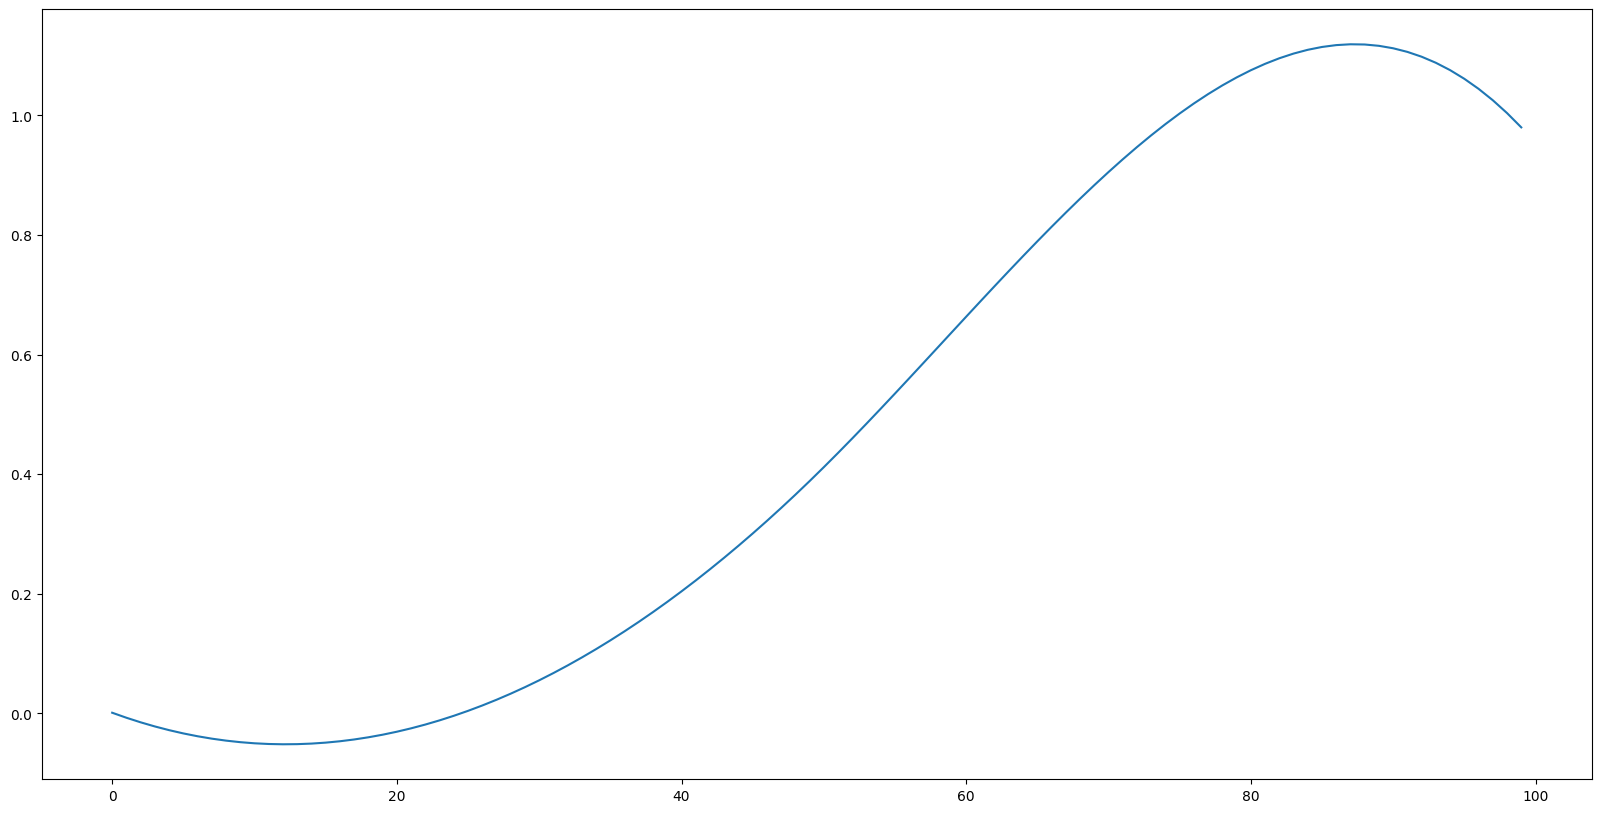

In [326]:
density_input = np.array([0.001, 0.002, 0.4, 0.99, 0.98]) # build a function that gradually fades in the horn and bass flute for the intro

density_function = build_density_function(density_input, 100)

# density_function = rng.triangular(-2, 0, 2, size = 100)
print(f'{density_function.shape = }')
Y = density_function
X = np.arange(0, density_function.shape[0], 1)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(X, Y)
plt.show()

cs, pt = start_csound()
stop_csound(cs, pt)